In [232]:
import pandas as pd
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import cairocffi as cario
from matplotlib.backends.backend_pdf import PdfPages

### Базовая часть

Реализуем функцию pca(A).

In [657]:
def pca(A):
    m = len(A)
    K = A.T @ A
    
    w, v = np.linalg.eig(K)
    
    idx = w.argsort()[::-1]   
    w = w[idx]
    v = v[:,idx]
    
    sigma = sqrt(w) / sqrt(m - 1)
    return(v.T, sigma)

Считаем данные из указанного файла. Будем считывать их таким образом, чтобы также хранить информацию о диагнозе. Так как нам известно, что признаков всего 30, то присвоим еще названиям столбцов значения от 0 до 29. Столбец с названием 'ID' содержит ID пацинета, столбец с названием 'D' содержит информацию о диагнозе ('M' или 'B').

Подготовим данные для передачи их в функцию pca(A). Для этого сначала центрируем их, то есть, вычислив выборочное среднее для каждого из 30 столбцов, вычтем его из значений матрицы признаков. Для каждого из 30 столбцов будет свое выборочное среднее. А затем поделим каждый элемент получившейся матрицы на стандартное отклонение признака от среднего (снова для каждого из 30 столбцов будет свое стандартное отклонение)

Извлечем характеристики опухолей из df. А затем центрируем полученную матрицу признаков с помощью полученных значений

In [659]:
col = [i + 1 for i in range(30)]                     # названия столбцов признаков

df = pd.read_csv('wdbc.data', 
                 names = ['ID', 'D'] + col)          # получение данных из файла

x = np.array([df[i + 1].mean() for i in range(30)])  # вычисление средних
                                                     # значений для каждого признака
    
ex = np.array([x for i in range(569)])               # формирование матрицы
                                                     # со среднимим значениями
    
sigma = np.diag(np.array([1 / df[i + 1].std() 
                          for i in range(30)]), 0)   # вычисление
                                                     # стандартных отклонений

X = df.loc[:, col].values    # получение матрицы количественных признаков           
A = (X - ex) @ sigma         # стандартизация данных
v, w = pca(A)                # применение функции pca(A) к модифицированным данным

In [660]:
def graphic(x, y, name):
    fig, ax = plt.subplots(figsize=(30, 30))
    plt.xlabel('n', fontsize=60, color='green')
    plt.ylabel(r'$\sqrt{\nu}\sigma_n$', fontsize=60, color='green')
    plt.rcParams.update({'font.size': 45}) 
    ax.set_xticks(col, minor=False)
    ax.xaxis.grid(True, which='major')
    ax.yaxis.grid(True, which='major')
    ax.plot(col, w, color='green', linewidth = 2, marker = 'o', markersize = 30, markerfacecolor = 'y',
             markeredgecolor = 'olive', markeredgewidth = 5)
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['font.family'] = 'Calibri'
    with PdfPages(f'{name}.pdf') as pdf:
        pdf.savefig()

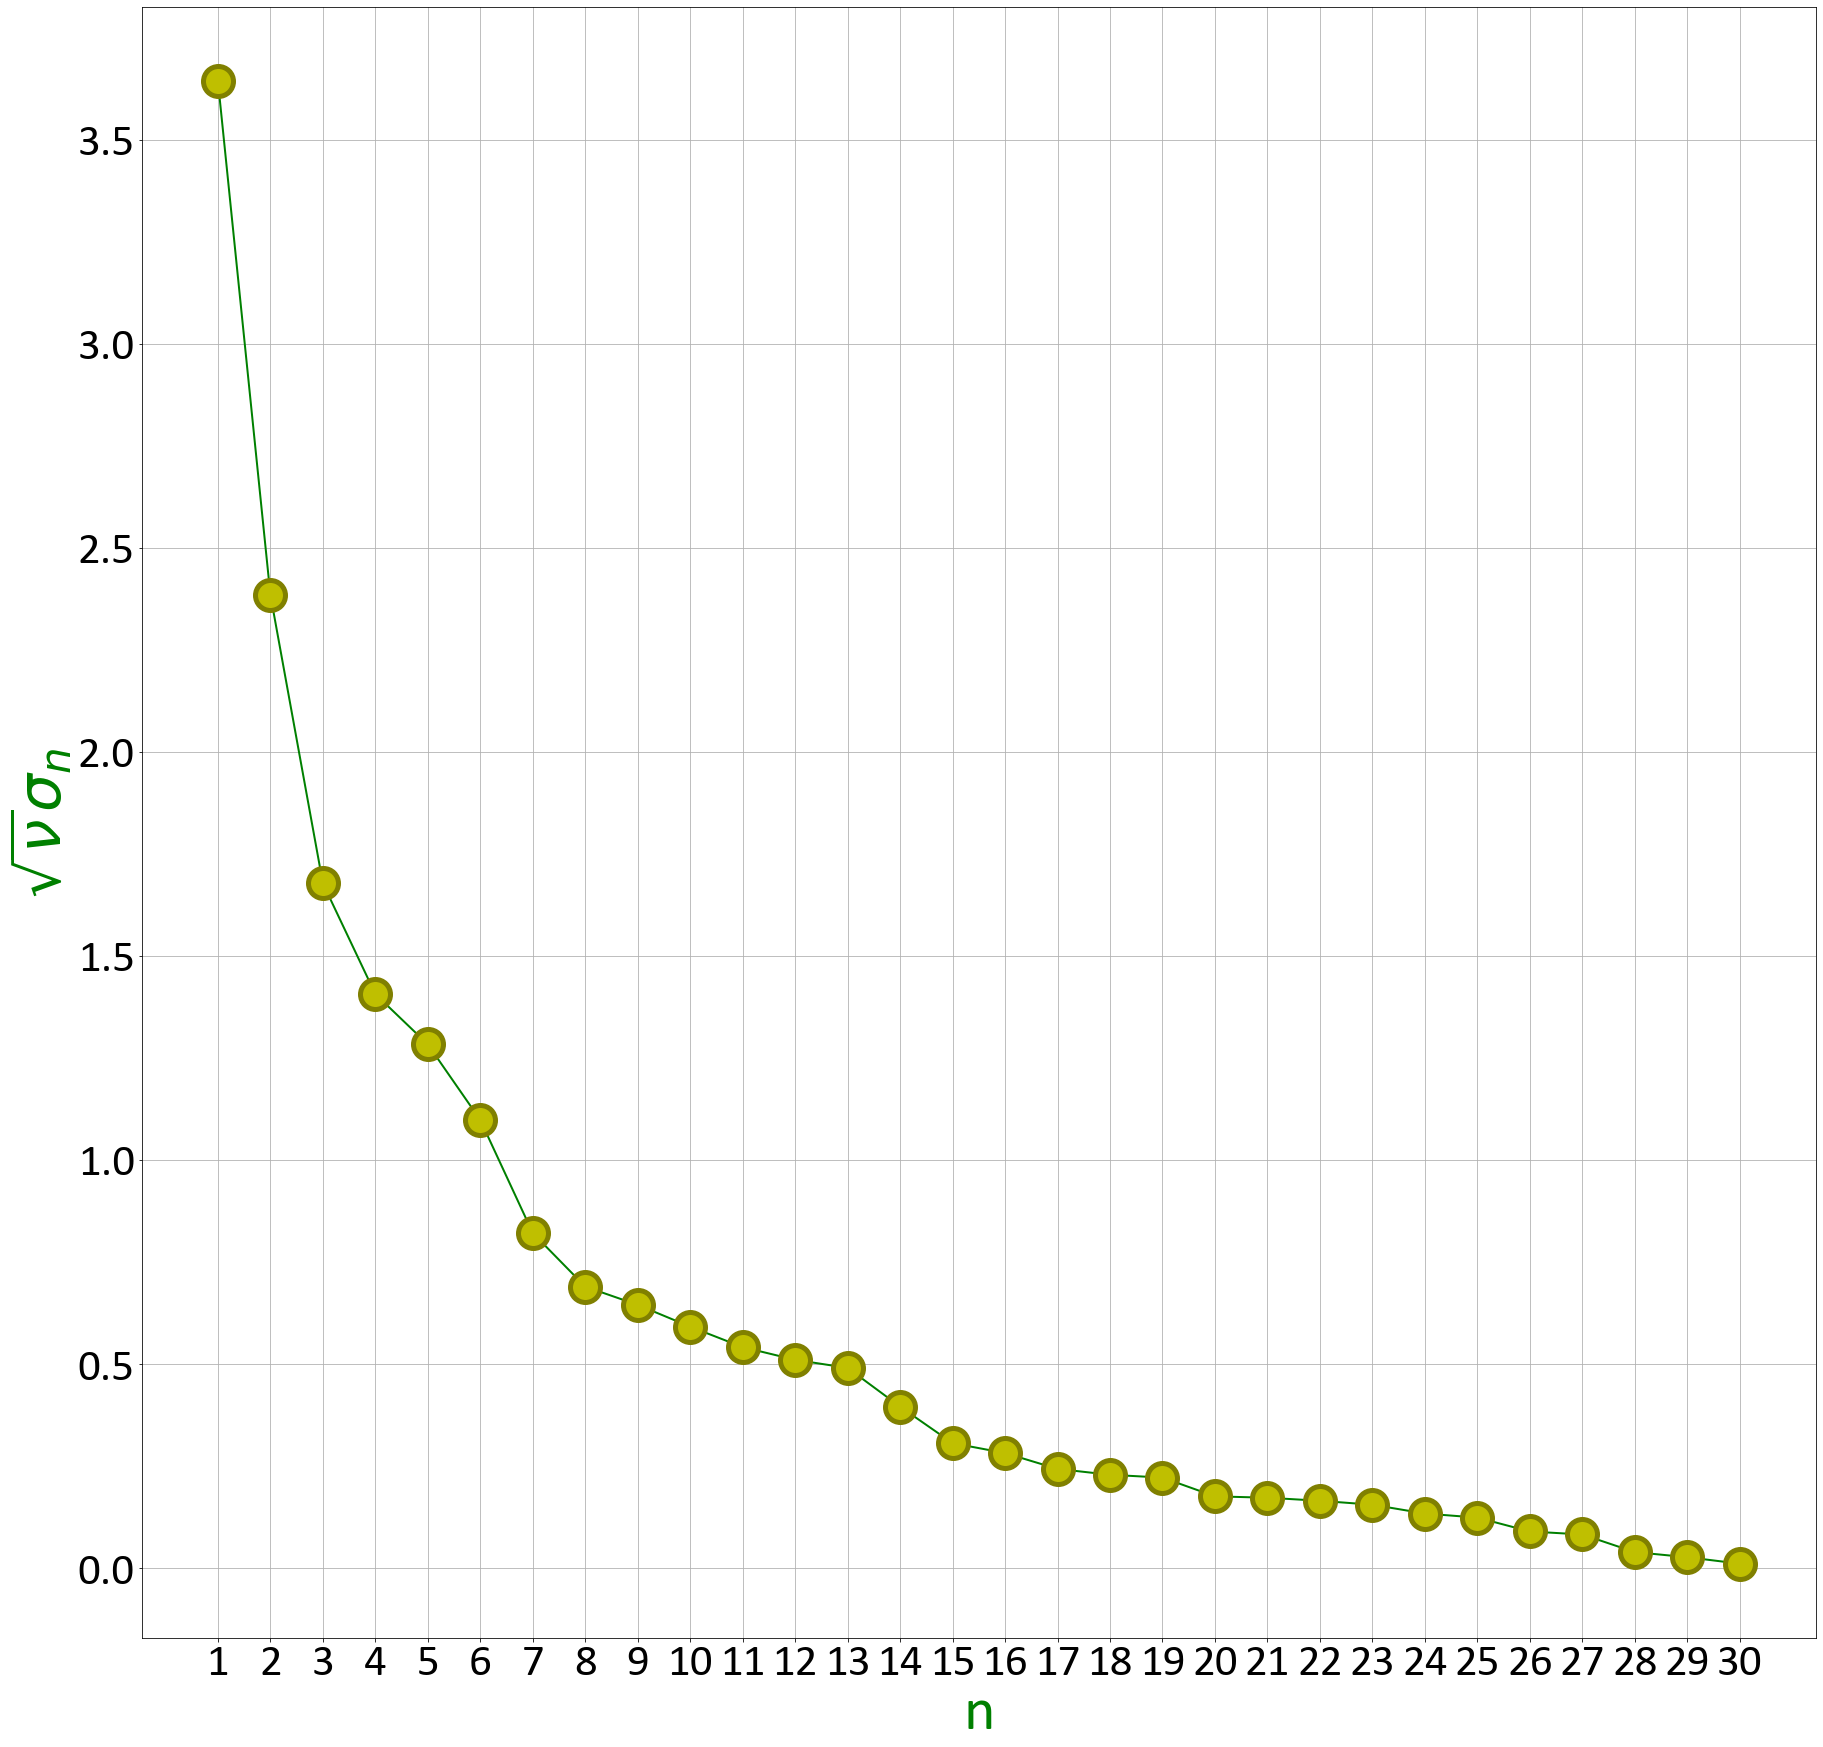

In [661]:
graphic(col, w, 'std_div')

In [649]:
w

array([3.64439401, 2.38565601, 1.67867477, 1.40735229, 1.28402903,
       1.0987978 , 0.82171778, 0.69037464, 0.64567392, 0.59219377,
       0.54213992, 0.5110395 , 0.49128148, 0.39624453, 0.30681422,
       0.28260007, 0.24371918, 0.22938785, 0.22243559, 0.17652026,
       0.17312681, 0.16564843, 0.1560155 , 0.13436892, 0.12442376,
       0.0904303 , 0.08306903, 0.0398665 , 0.02736427, 0.01153451])

In [666]:
len(A)

569

In [663]:
pc_vec = np.column_stack([v[0], v[1]])
A_proj = A @ pc_vec

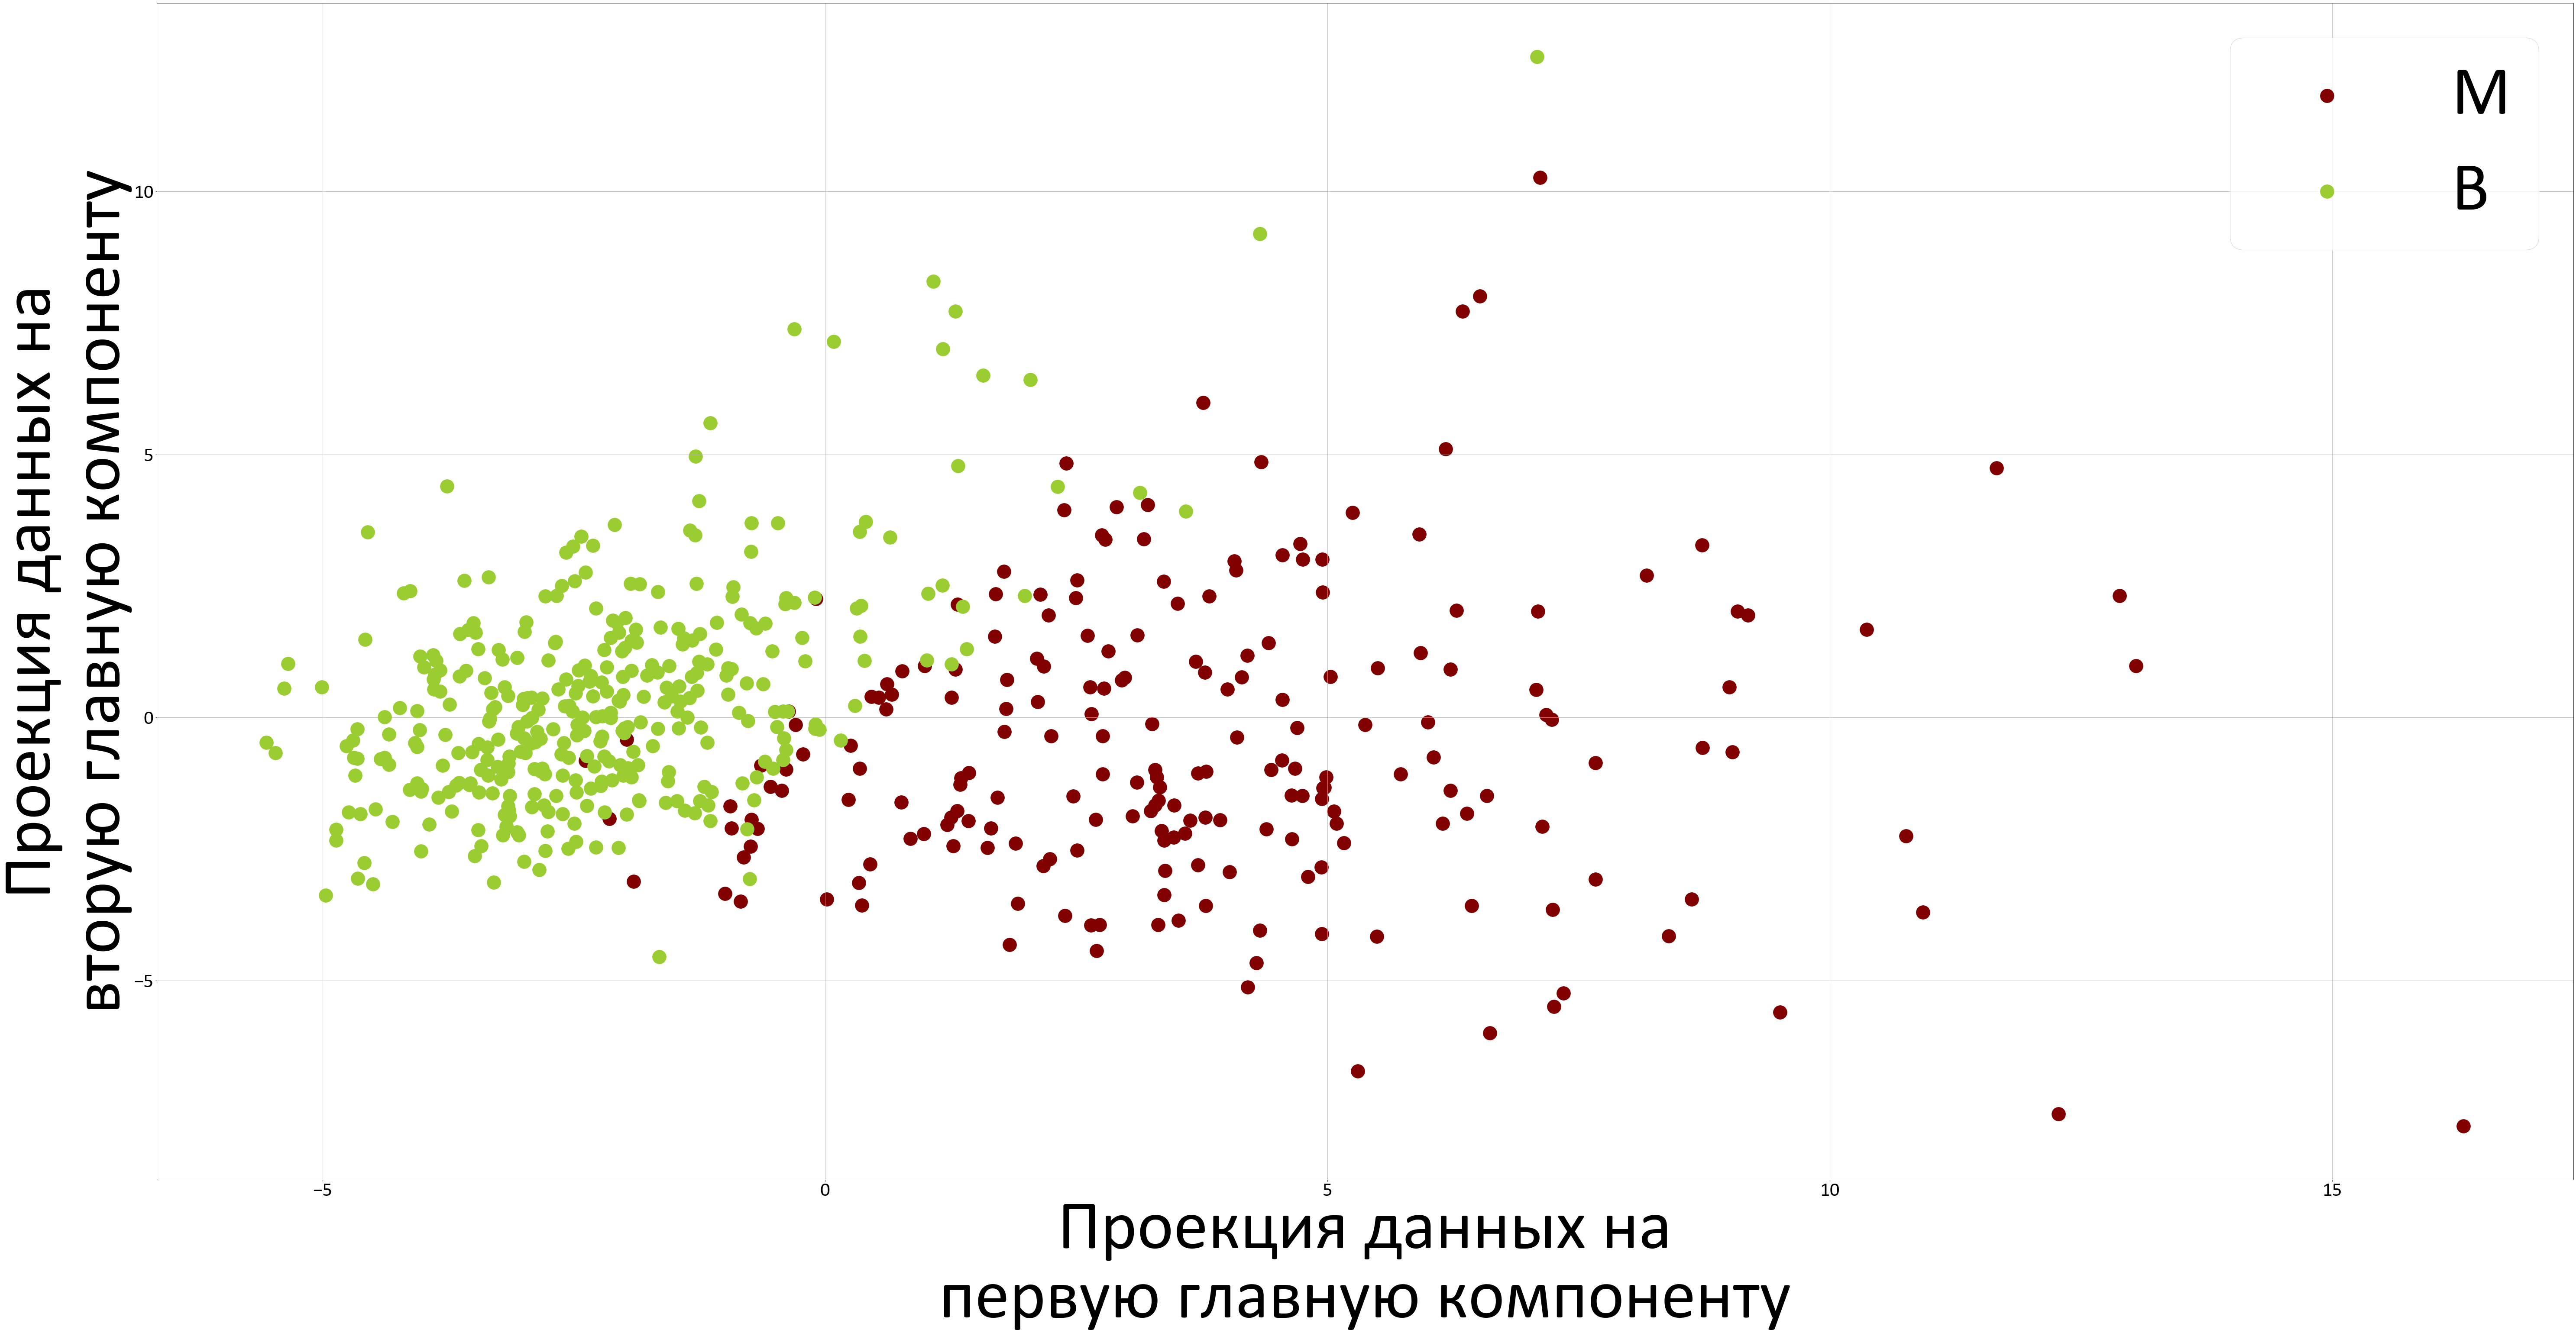

In [665]:
pс_proj = pd.DataFrame(data = A_proj , columns = ['pc_1', 'pc_2'])
final = pd.concat([pс_proj, df[['D']]], axis = 1)

fig, ax = plt.subplots(figsize=(100, 50))
ax.set_xlabel('Проекция данных на\nпервую главную компоненту', fontsize = 160)
ax.set_ylabel('Проекция данных на\nвторую главную компоненту', fontsize = 160)
plt.rcParams.update({'font.size': 160})
targets = ['M', 'B']
colors = ['maroon', 'yellowgreen']
ax.grid()
for target, color in zip(targets, colors):
    indicesToKeep = final['D'] == target
    ax.scatter(final.loc[indicesToKeep, 'pc_1'], final.loc[indicesToKeep, 'pc_2'], c = color, s = 1000)
    ax.legend(targets)
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['font.family'] = 'Calibri'
    with PdfPages('PCA.pdf') as pdf:
        pdf.savefig()
plt.show()

### ПРОДВИНУТАЯ ЧАСТЬ

Напишем функцию для построения лапласианов указанных графов.

In [690]:
def laplac(G):
    D = []
    for g in G:
        D.append(sum(g))
    return np.diag(D, 0) - G

Построим лапласианы графов.

In [691]:
G1 = np.ones((10, 1), float) @ np.ones((1, 10), float) - np.identity(10, float) 
L1 = laplac(G1)

In [692]:
G2 = np.array([[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
               [0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
               [1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
               [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]])
L2 = laplac(G2)

In [693]:
G3 = (pd.read_table('adjacency_matrix.txt', sep='\s+', engine='python', names=[i for i in range(1000)])).to_numpy()
L3 = laplac(G3)

In [619]:
def show_mat(M, name):
    fig, ax = plt.subplots(figsize=(40, 40))
    plt.rcParams.update({'font.size': 120}) 
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['font.family'] = 'Calibri'
    ax.matshow(M)
    with PdfPages(f'{name}.pdf') as pdf:
        pdf.savefig()

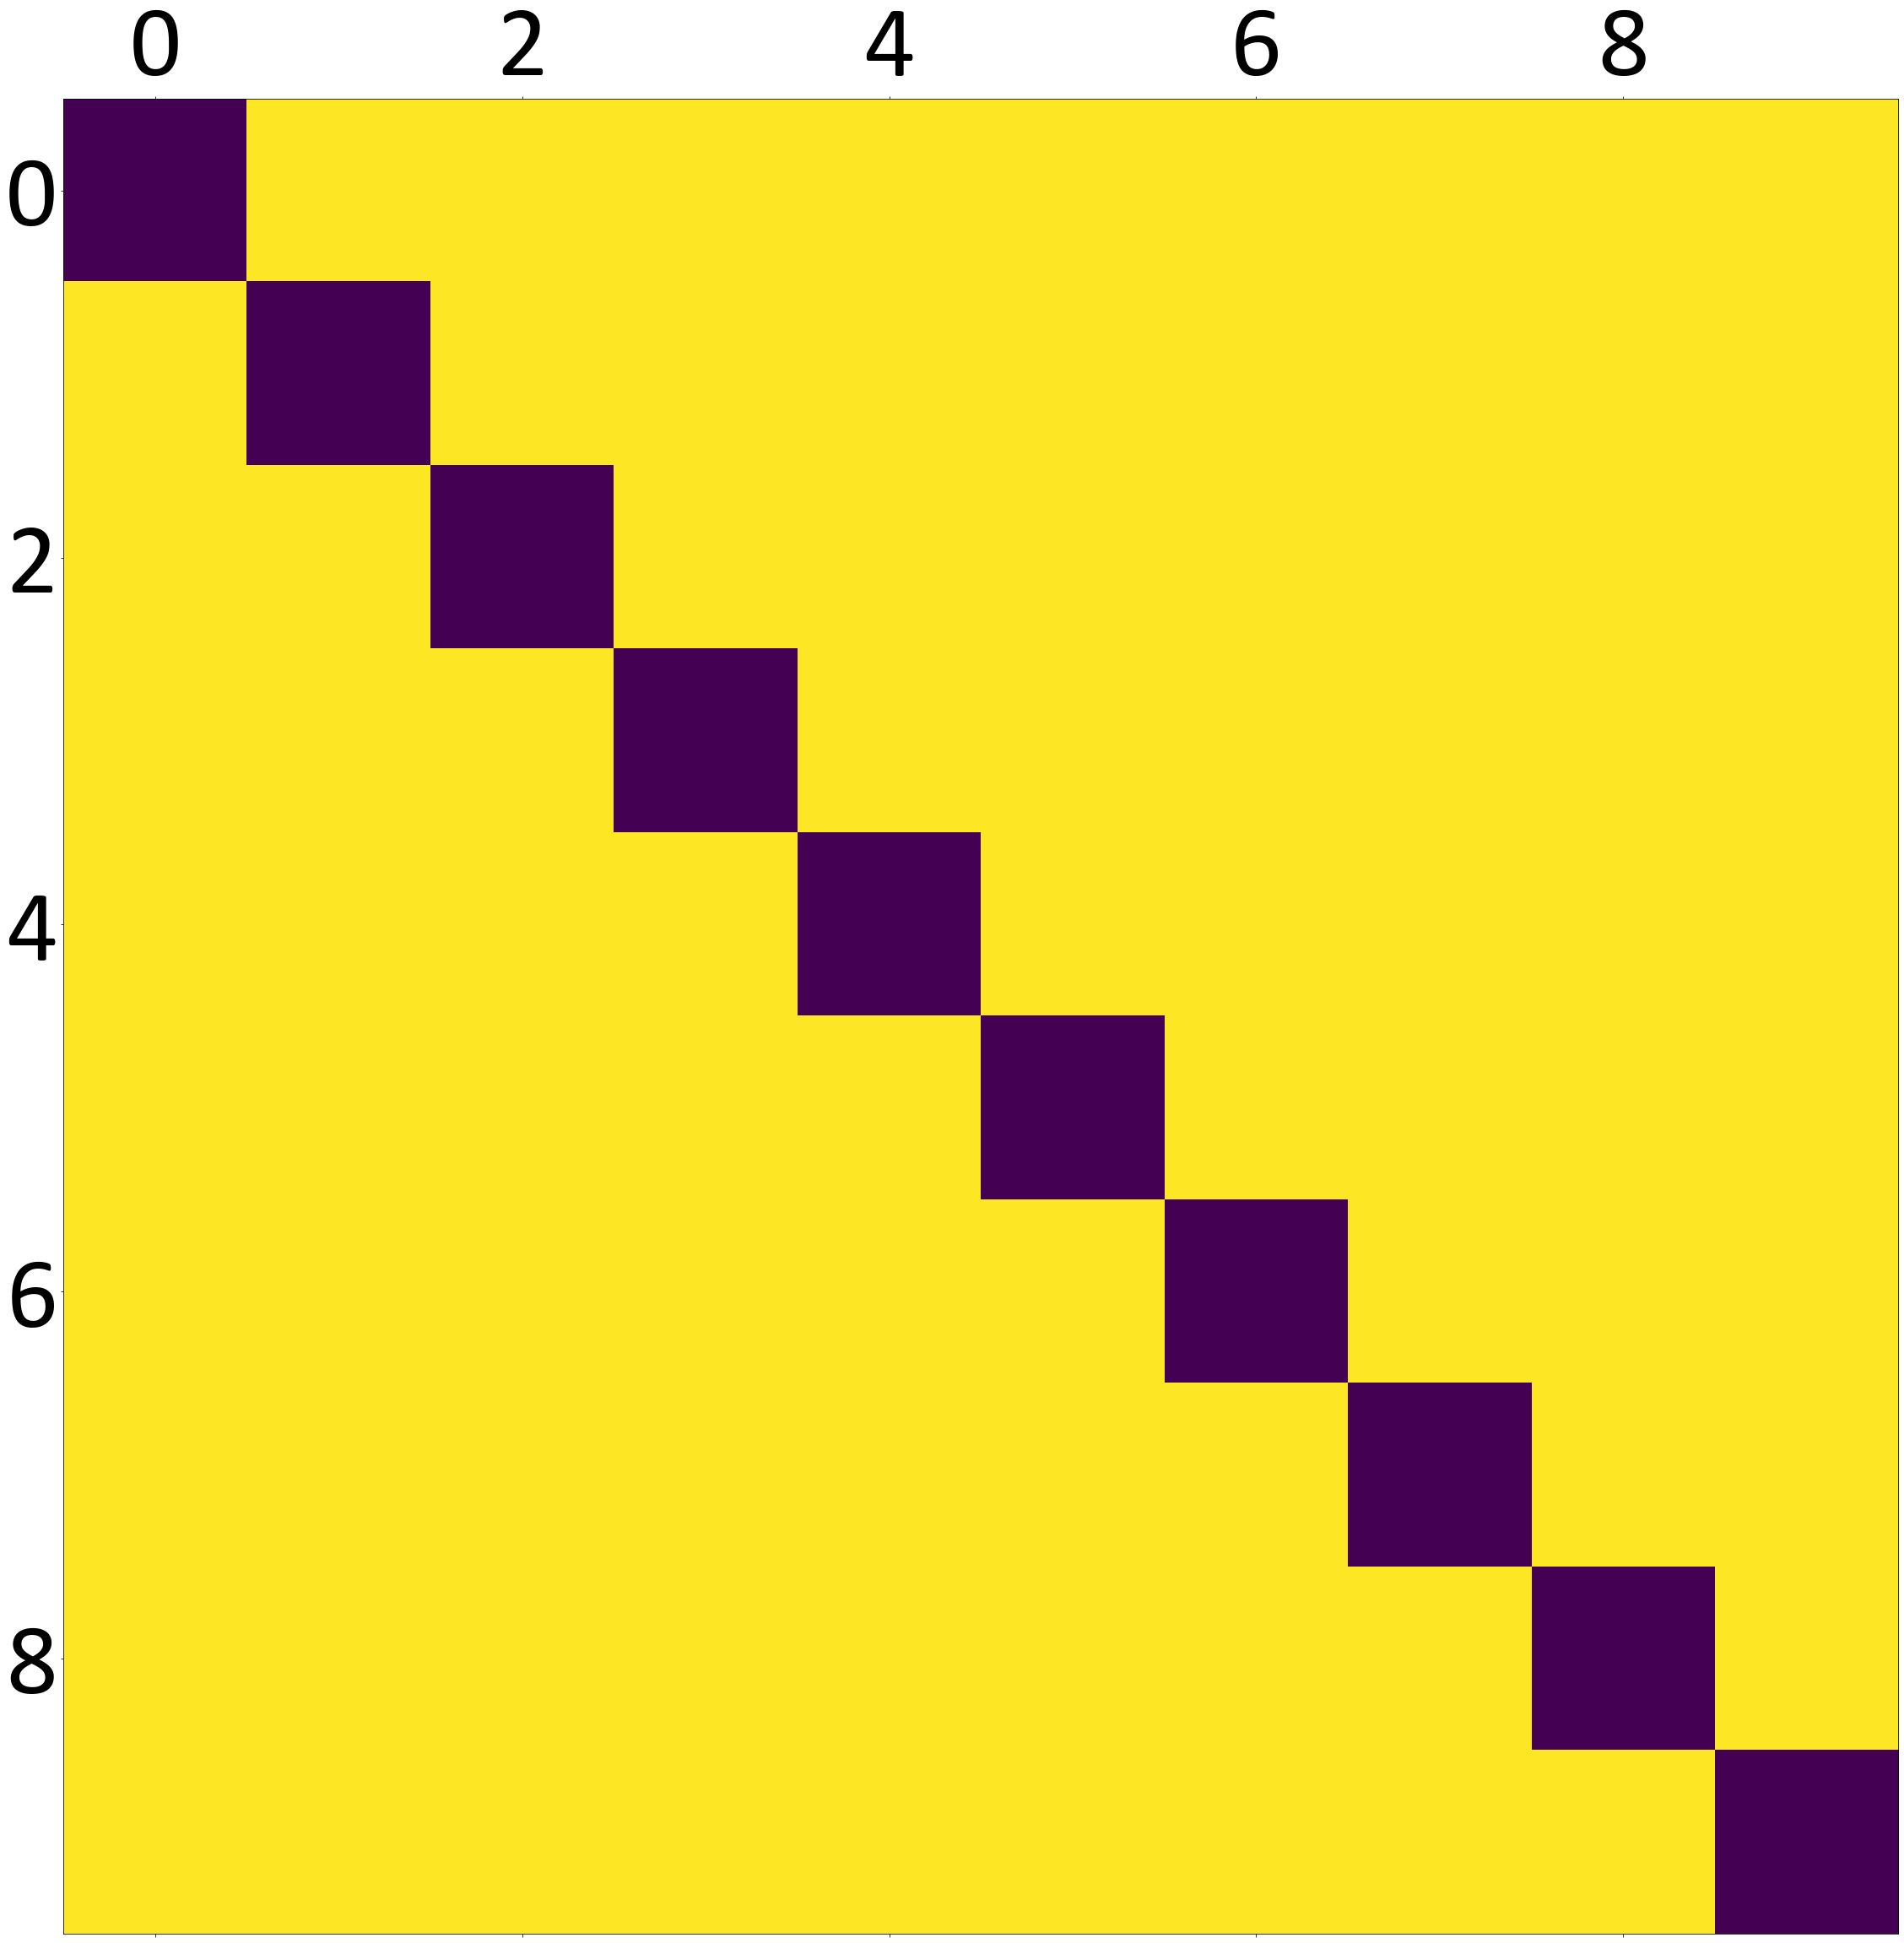

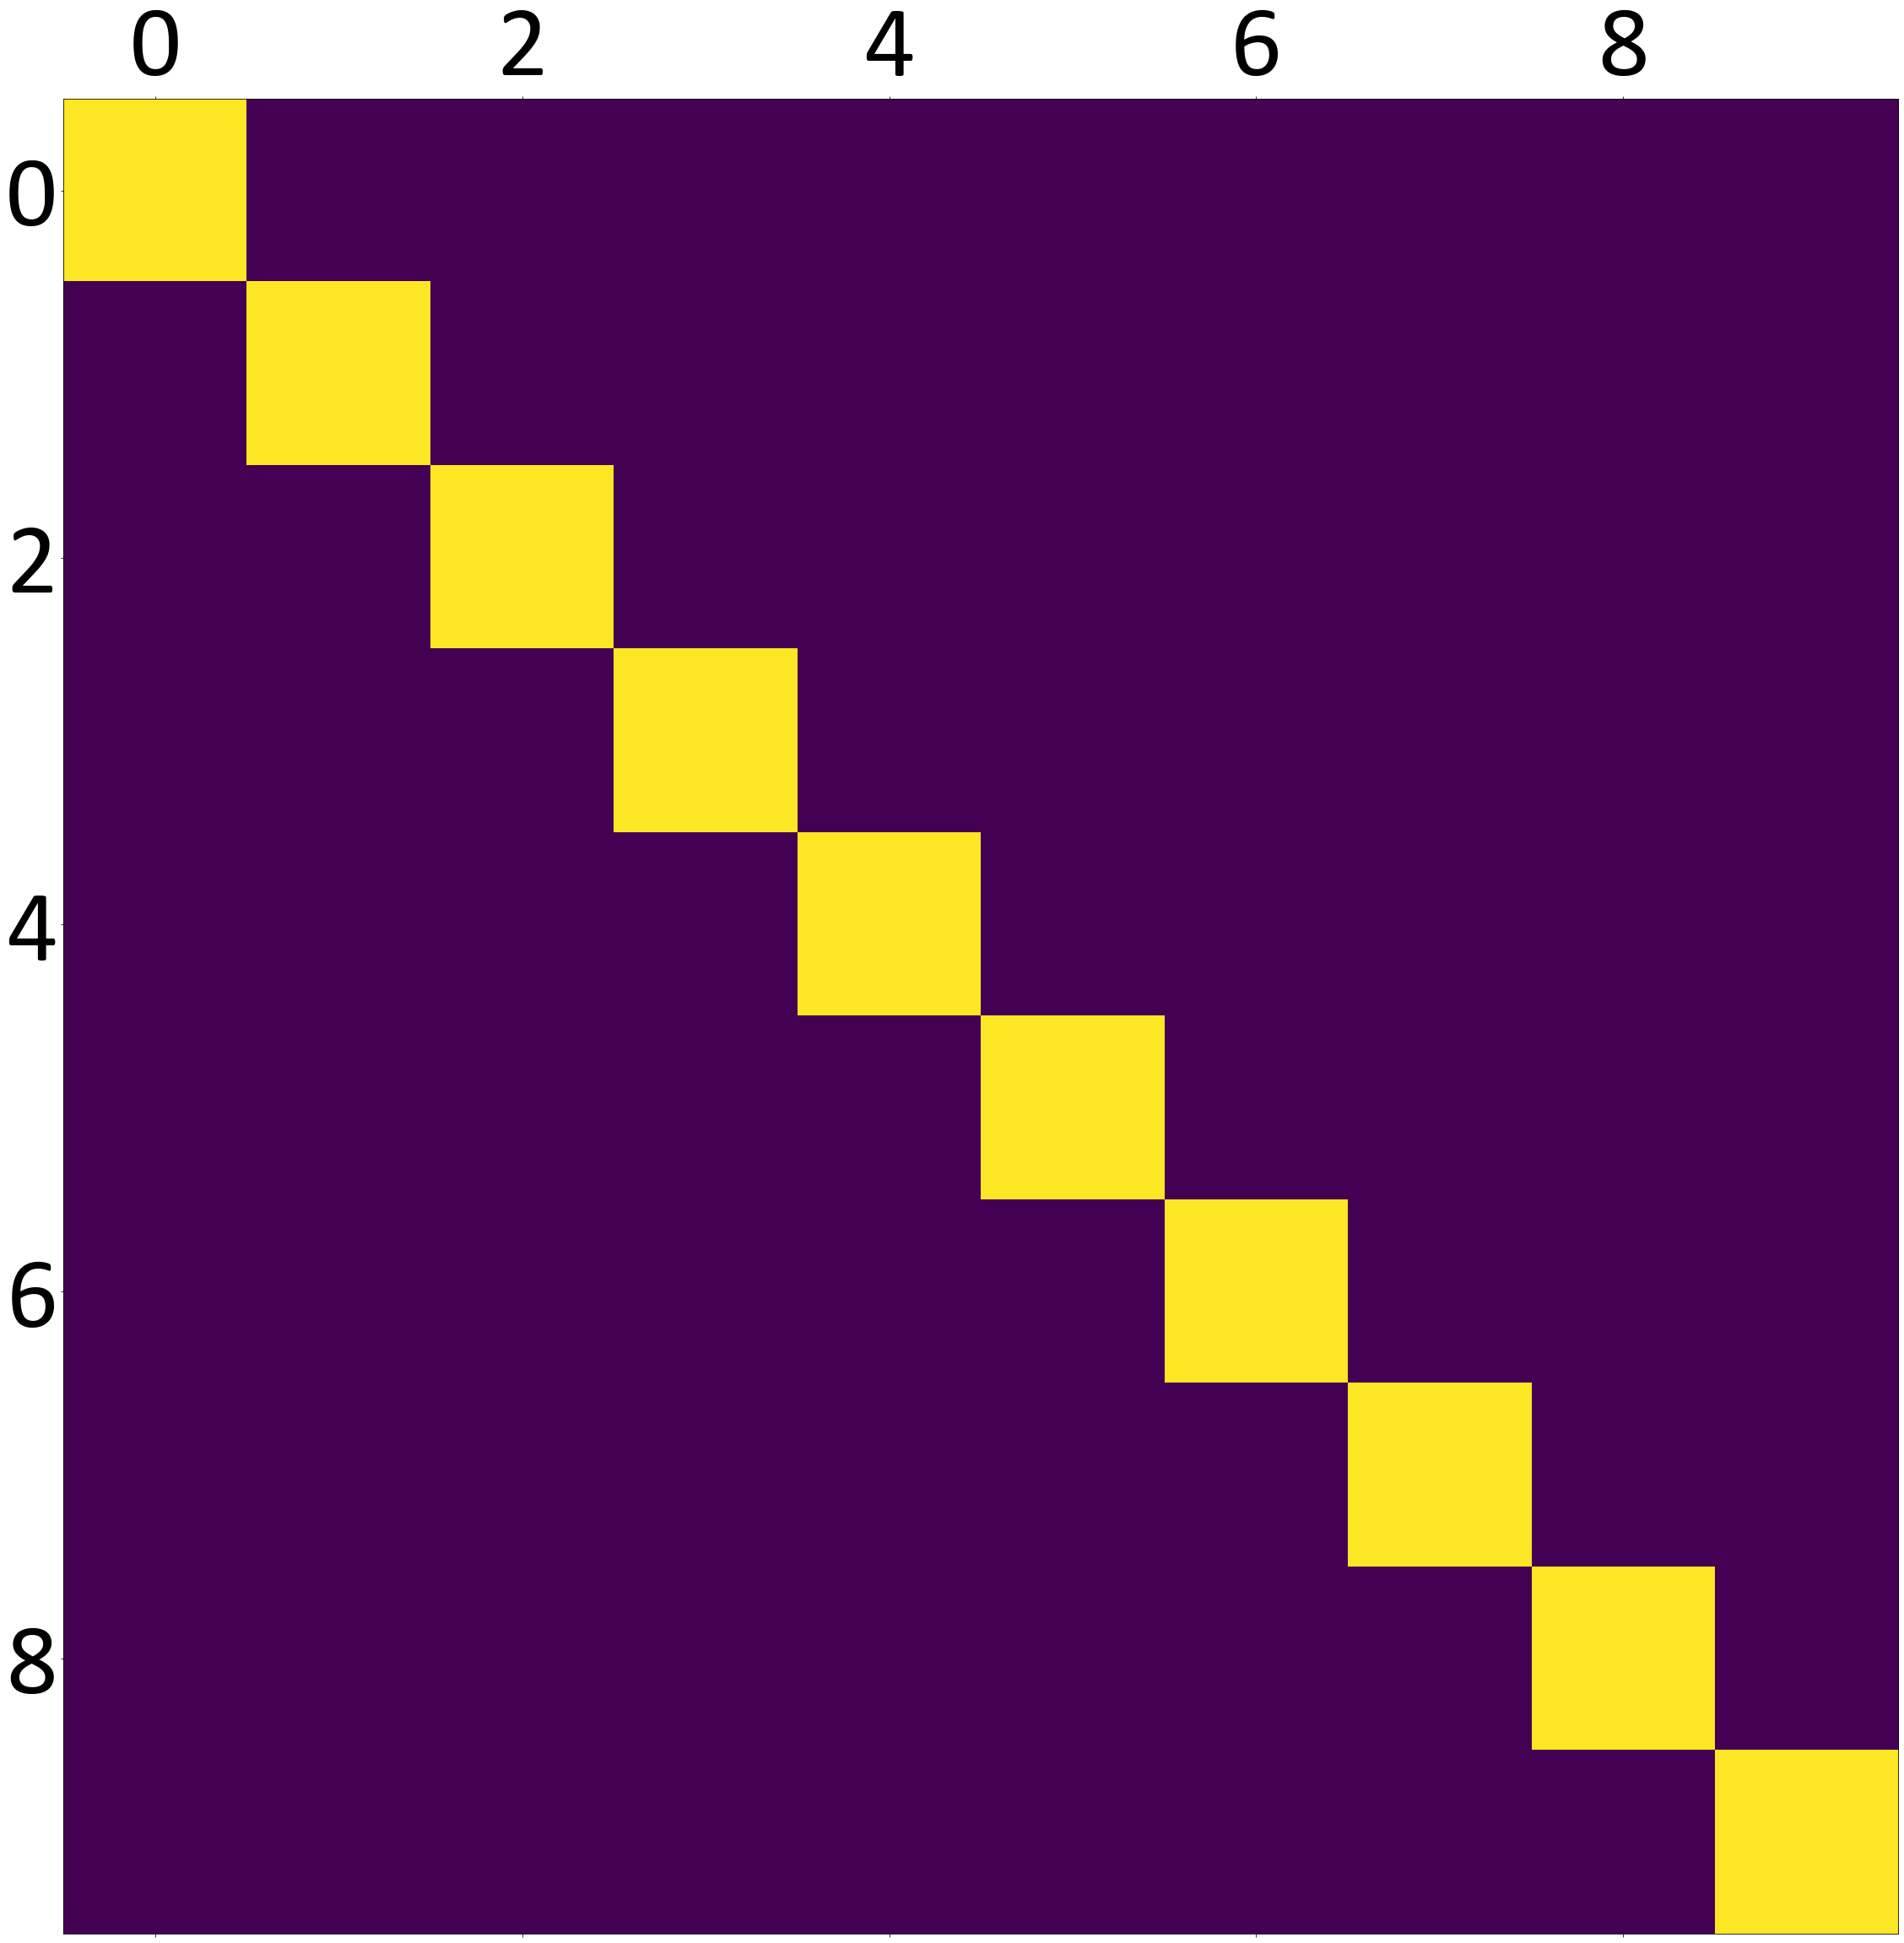

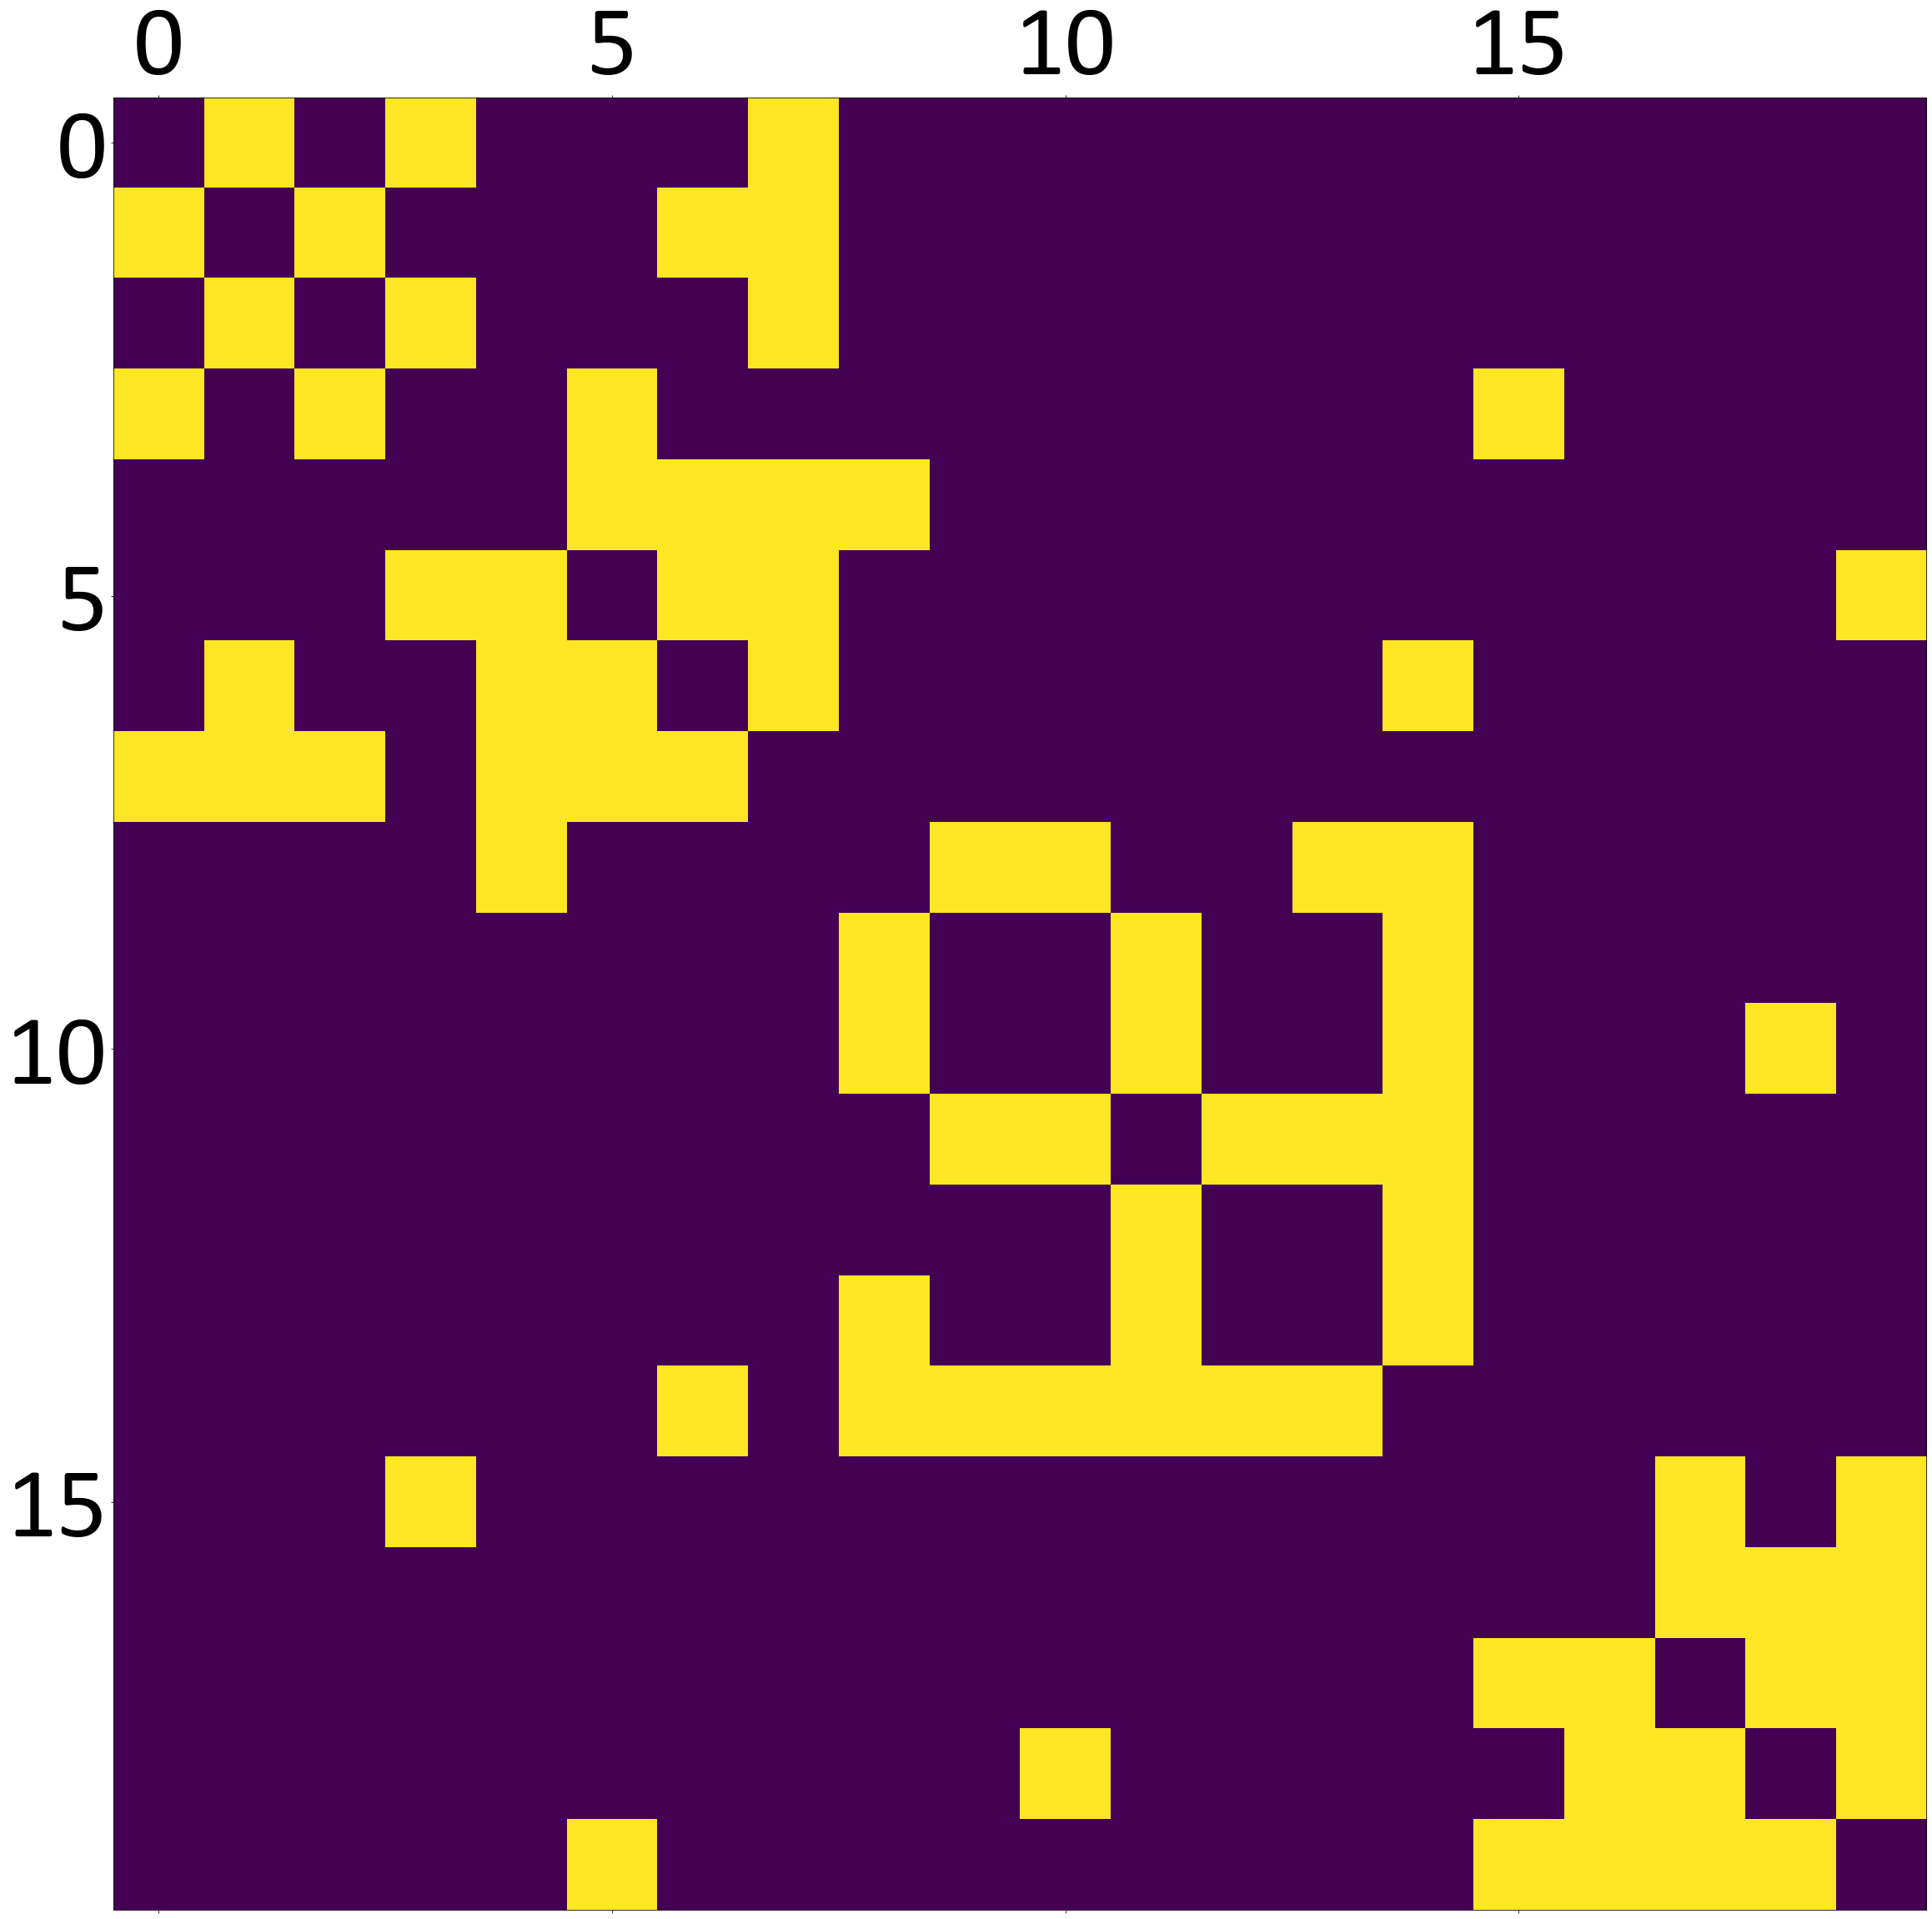

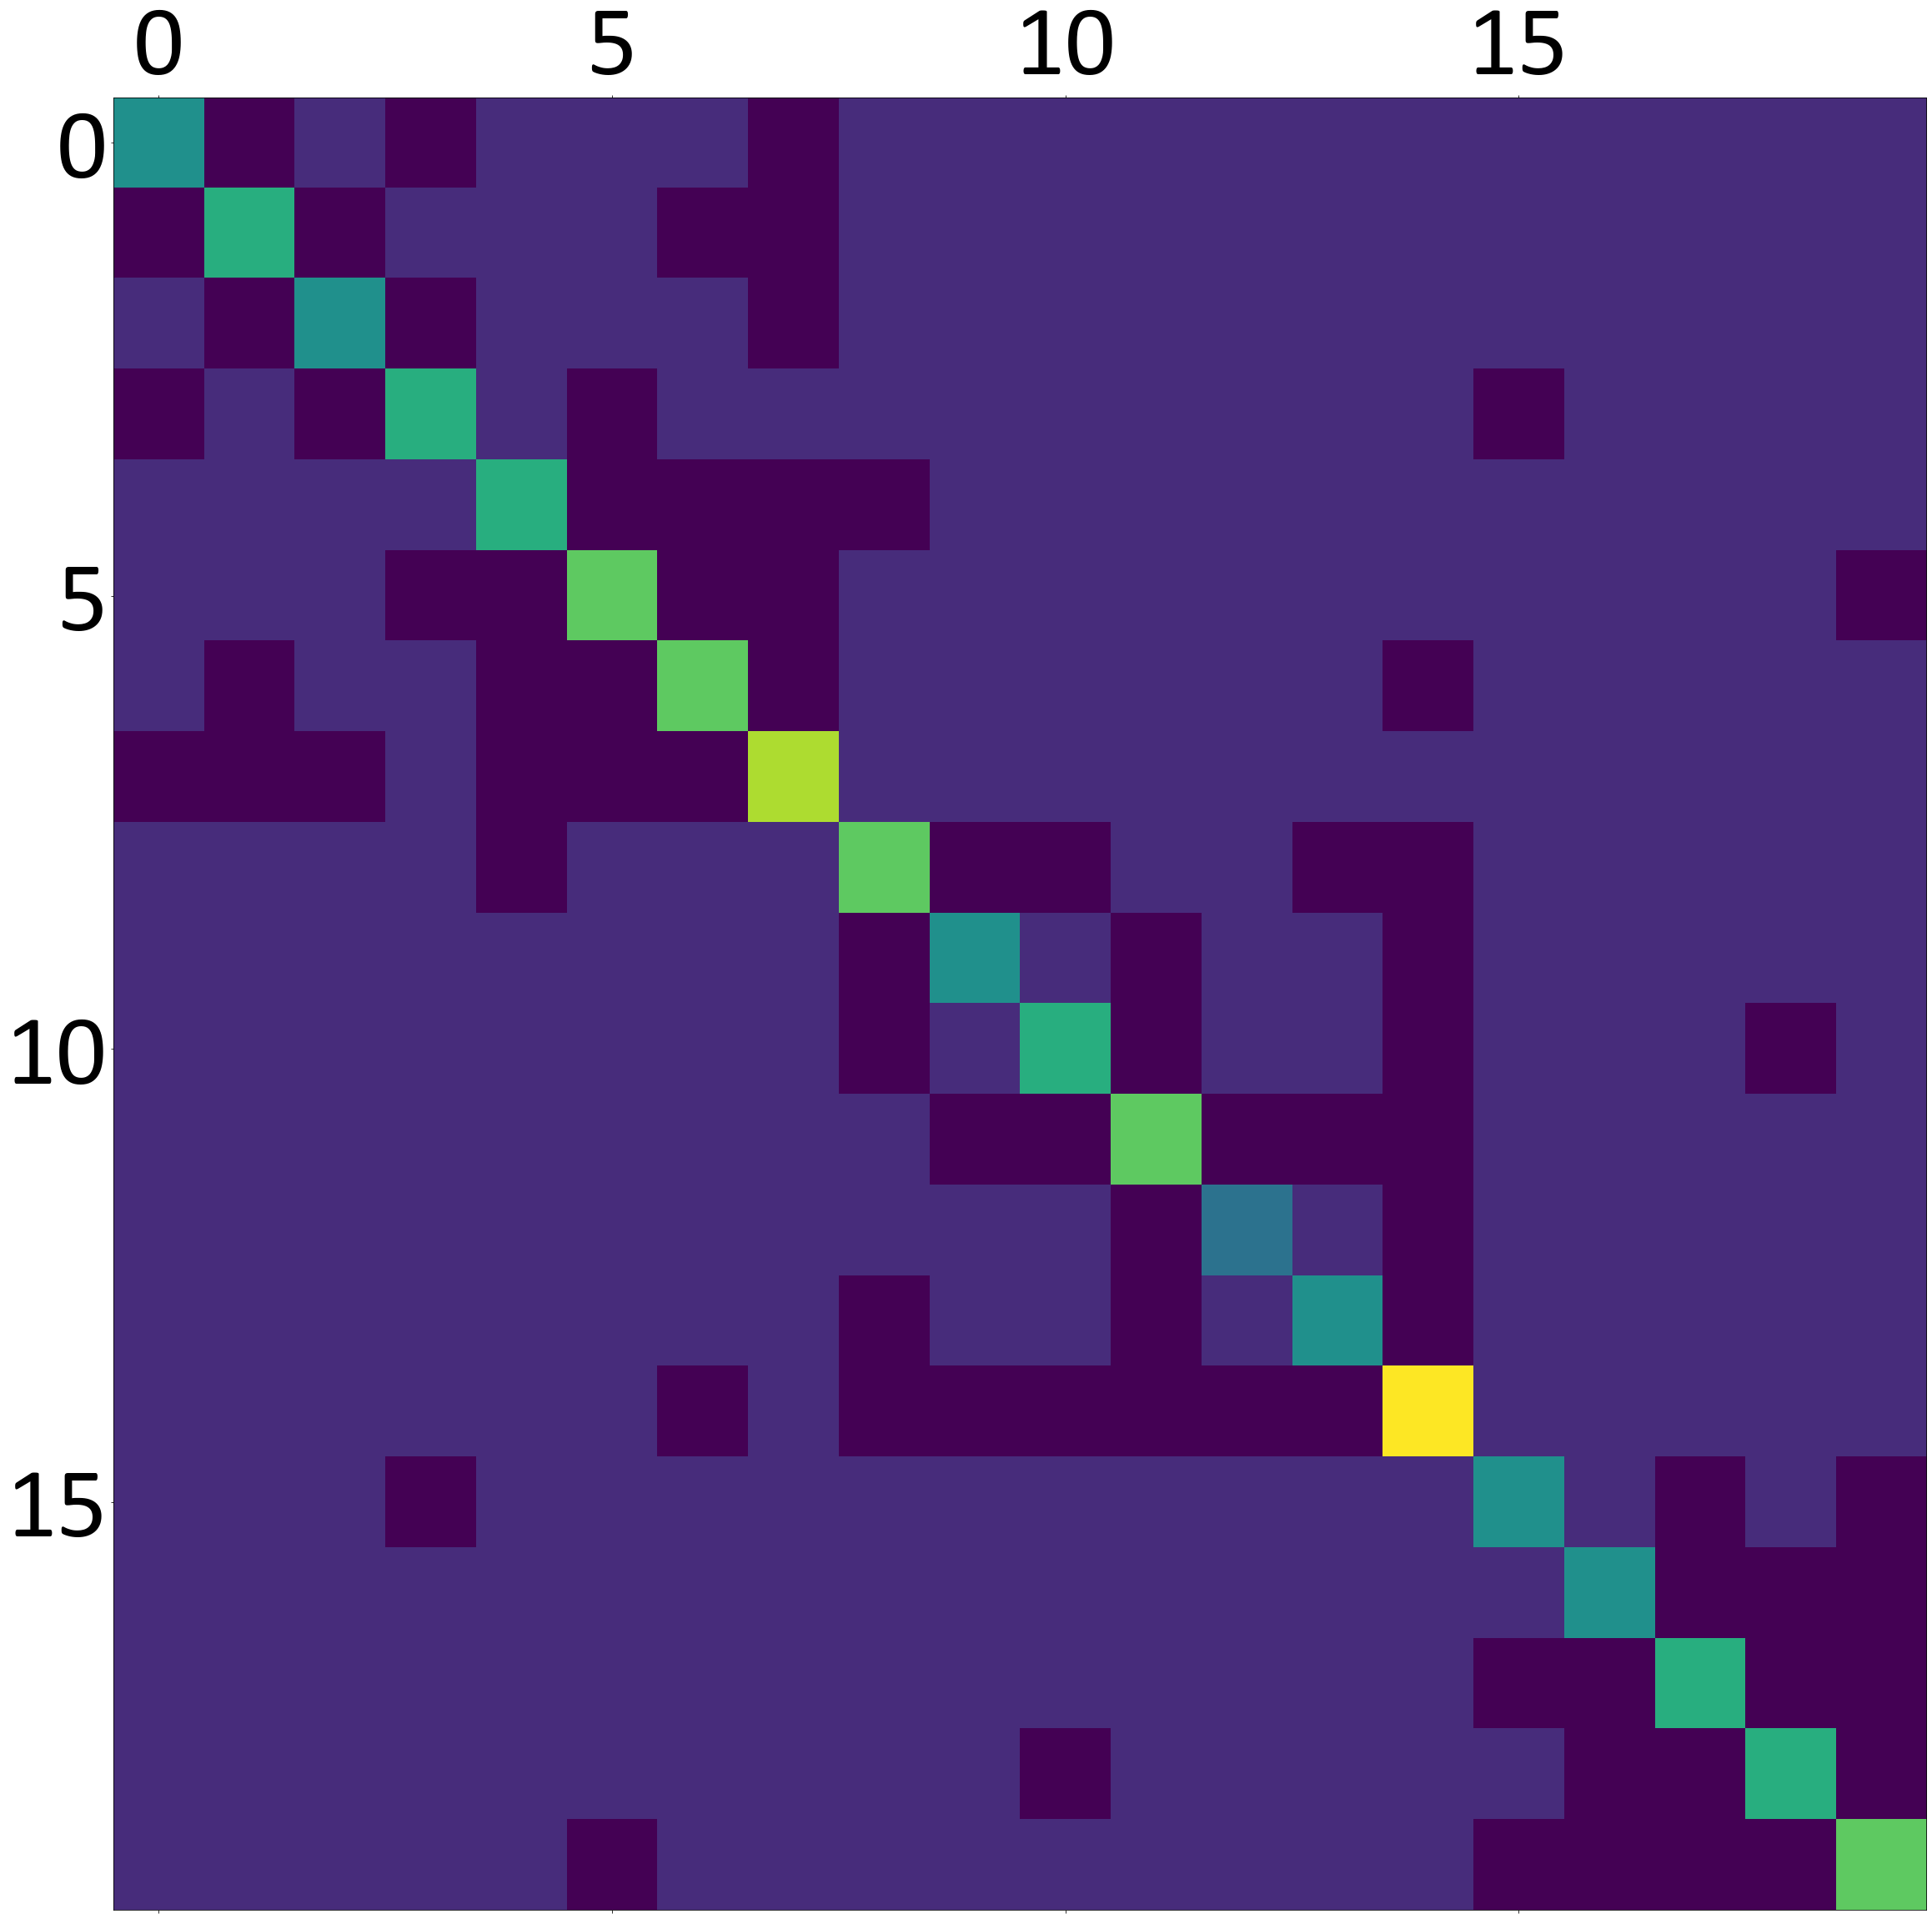

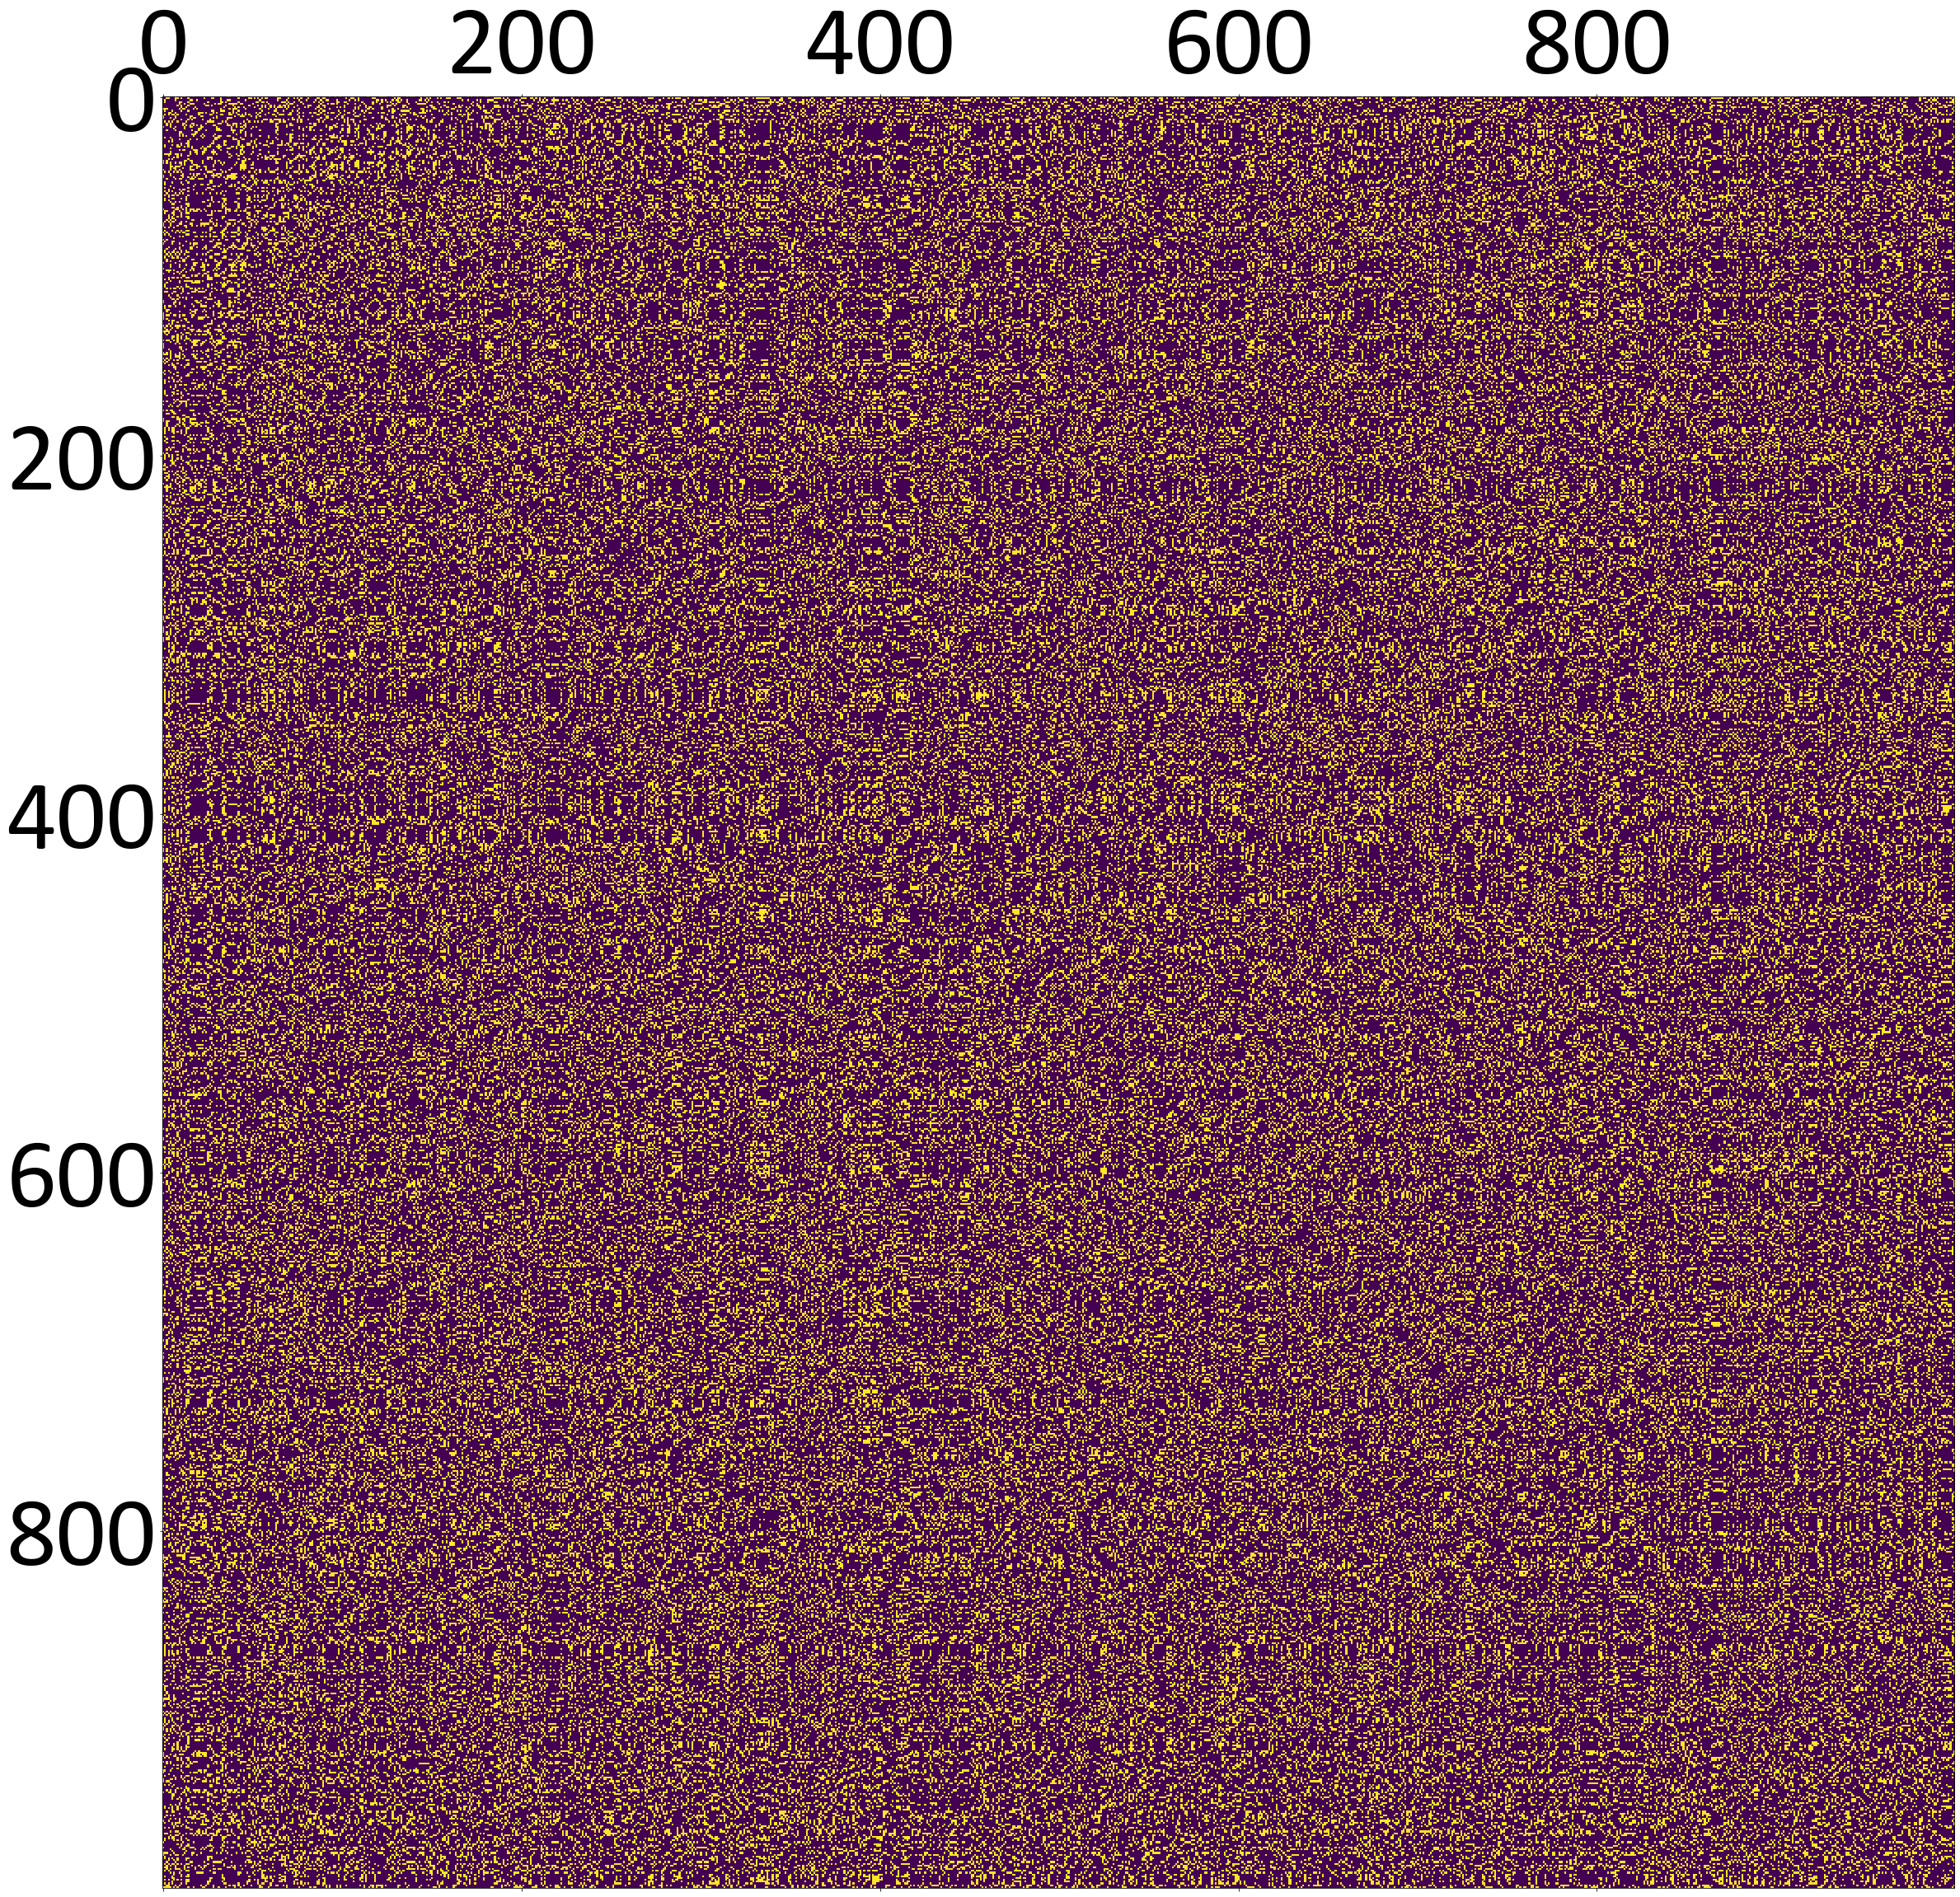

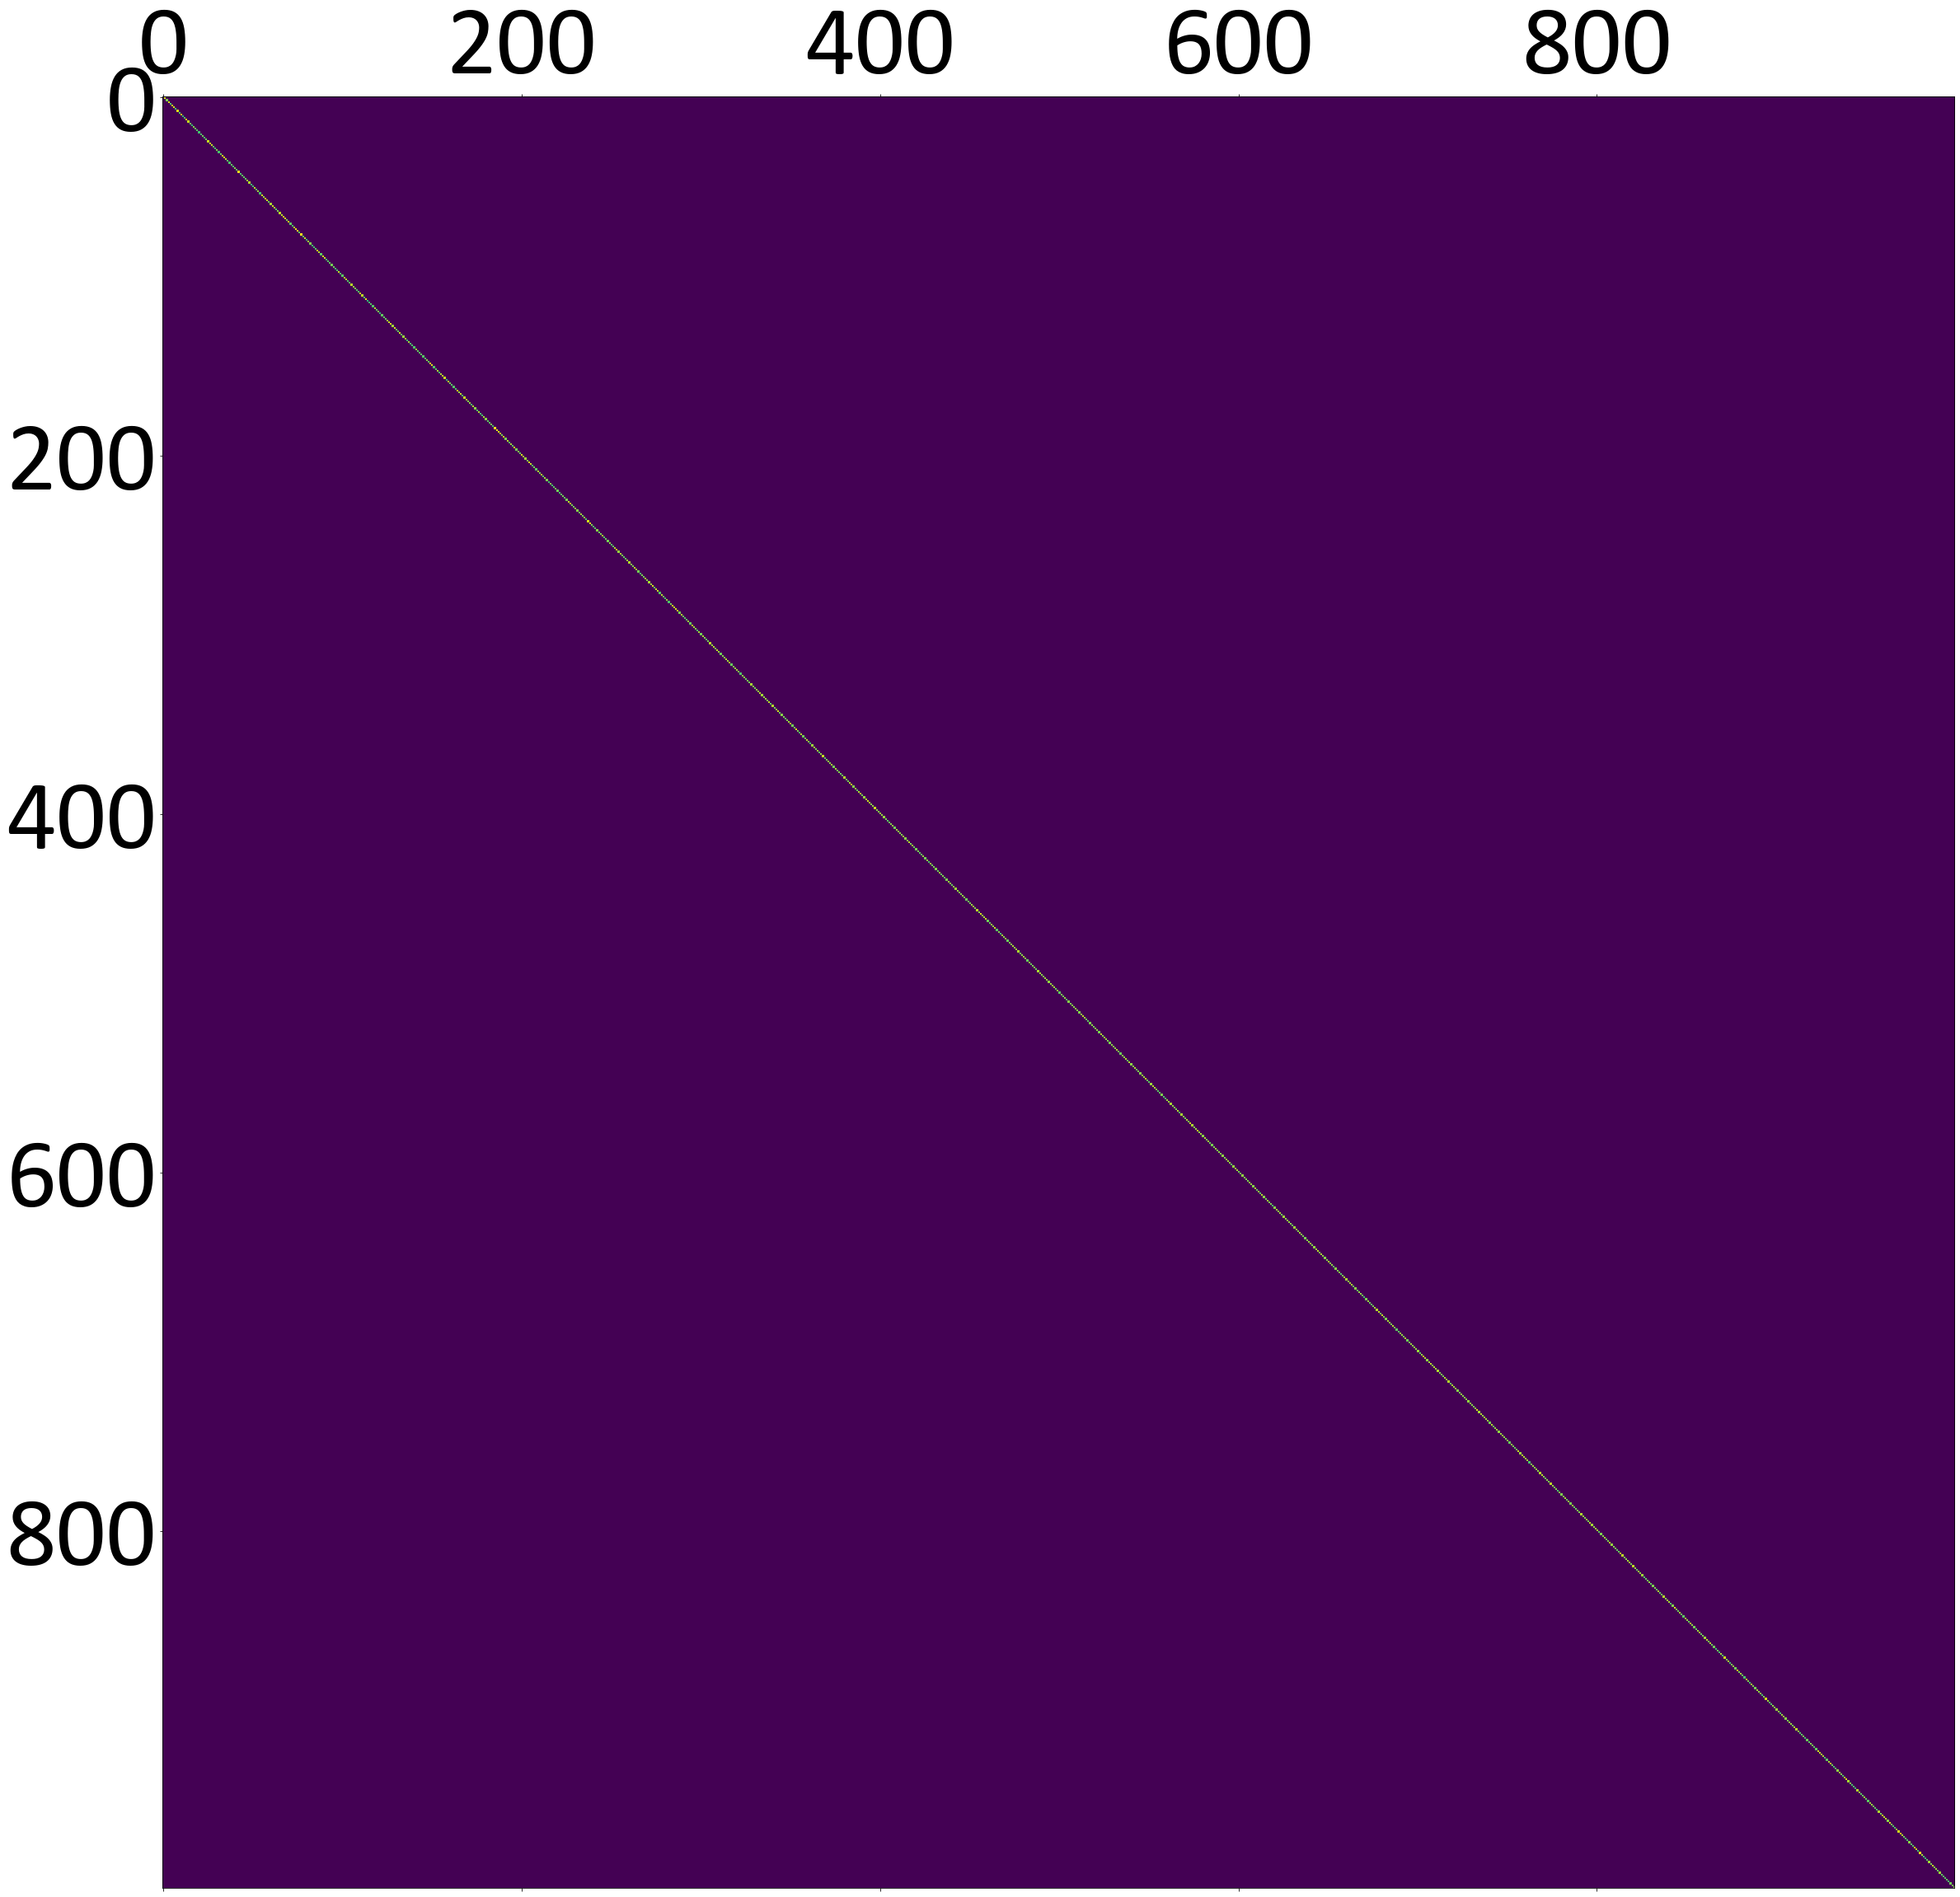

In [694]:
show_mat(G1, 'Матрица смежности графа G1')
show_mat(L1, 'Лапласиан графа G1')
show_mat(G2, 'Матрица смежности графа G2')
show_mat(L2, 'Лапласиан графа G2')
show_mat(G3, 'Матрица смежности графа G3')
show_mat(L3, 'Лапласиан графа G3')

Поиск спектров.

In [621]:
def spetrum(G):
    eigenValues, eigenVectors = np.linalg.eig(G)
    
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    
    return(eigenVectors.T, eigenValues)

In [747]:
spec1 = spetrum(L1)
spec2 = spetrum(L2)
spec3 = spetrum(L3)

In [750]:
def graph_vec(spec, name):
    idx = spec.argsort()[::-1]   
    spec = spec[idx]
    fig, ax = plt.subplots(figsize=(42, 42))
    plt.ylabel('Значение собственного числа', fontsize=120, color='green')
    plt.xlabel('Номер собственного числа', fontsize=120, color='green')
    plt.rcParams.update({'font.size': 120}) 
    ax.plot(idx, spec, color='green', linewidth = 0, marker = 'o', markersize = 40, markerfacecolor = 'y',
            markeredgecolor = 'olive', markeredgewidth = 5)
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['font.family'] = 'Calibri'
    plt.grid()
    with PdfPages(f'Отсортированный список сч {name}.pdf') as pdf:
        pdf.savefig()

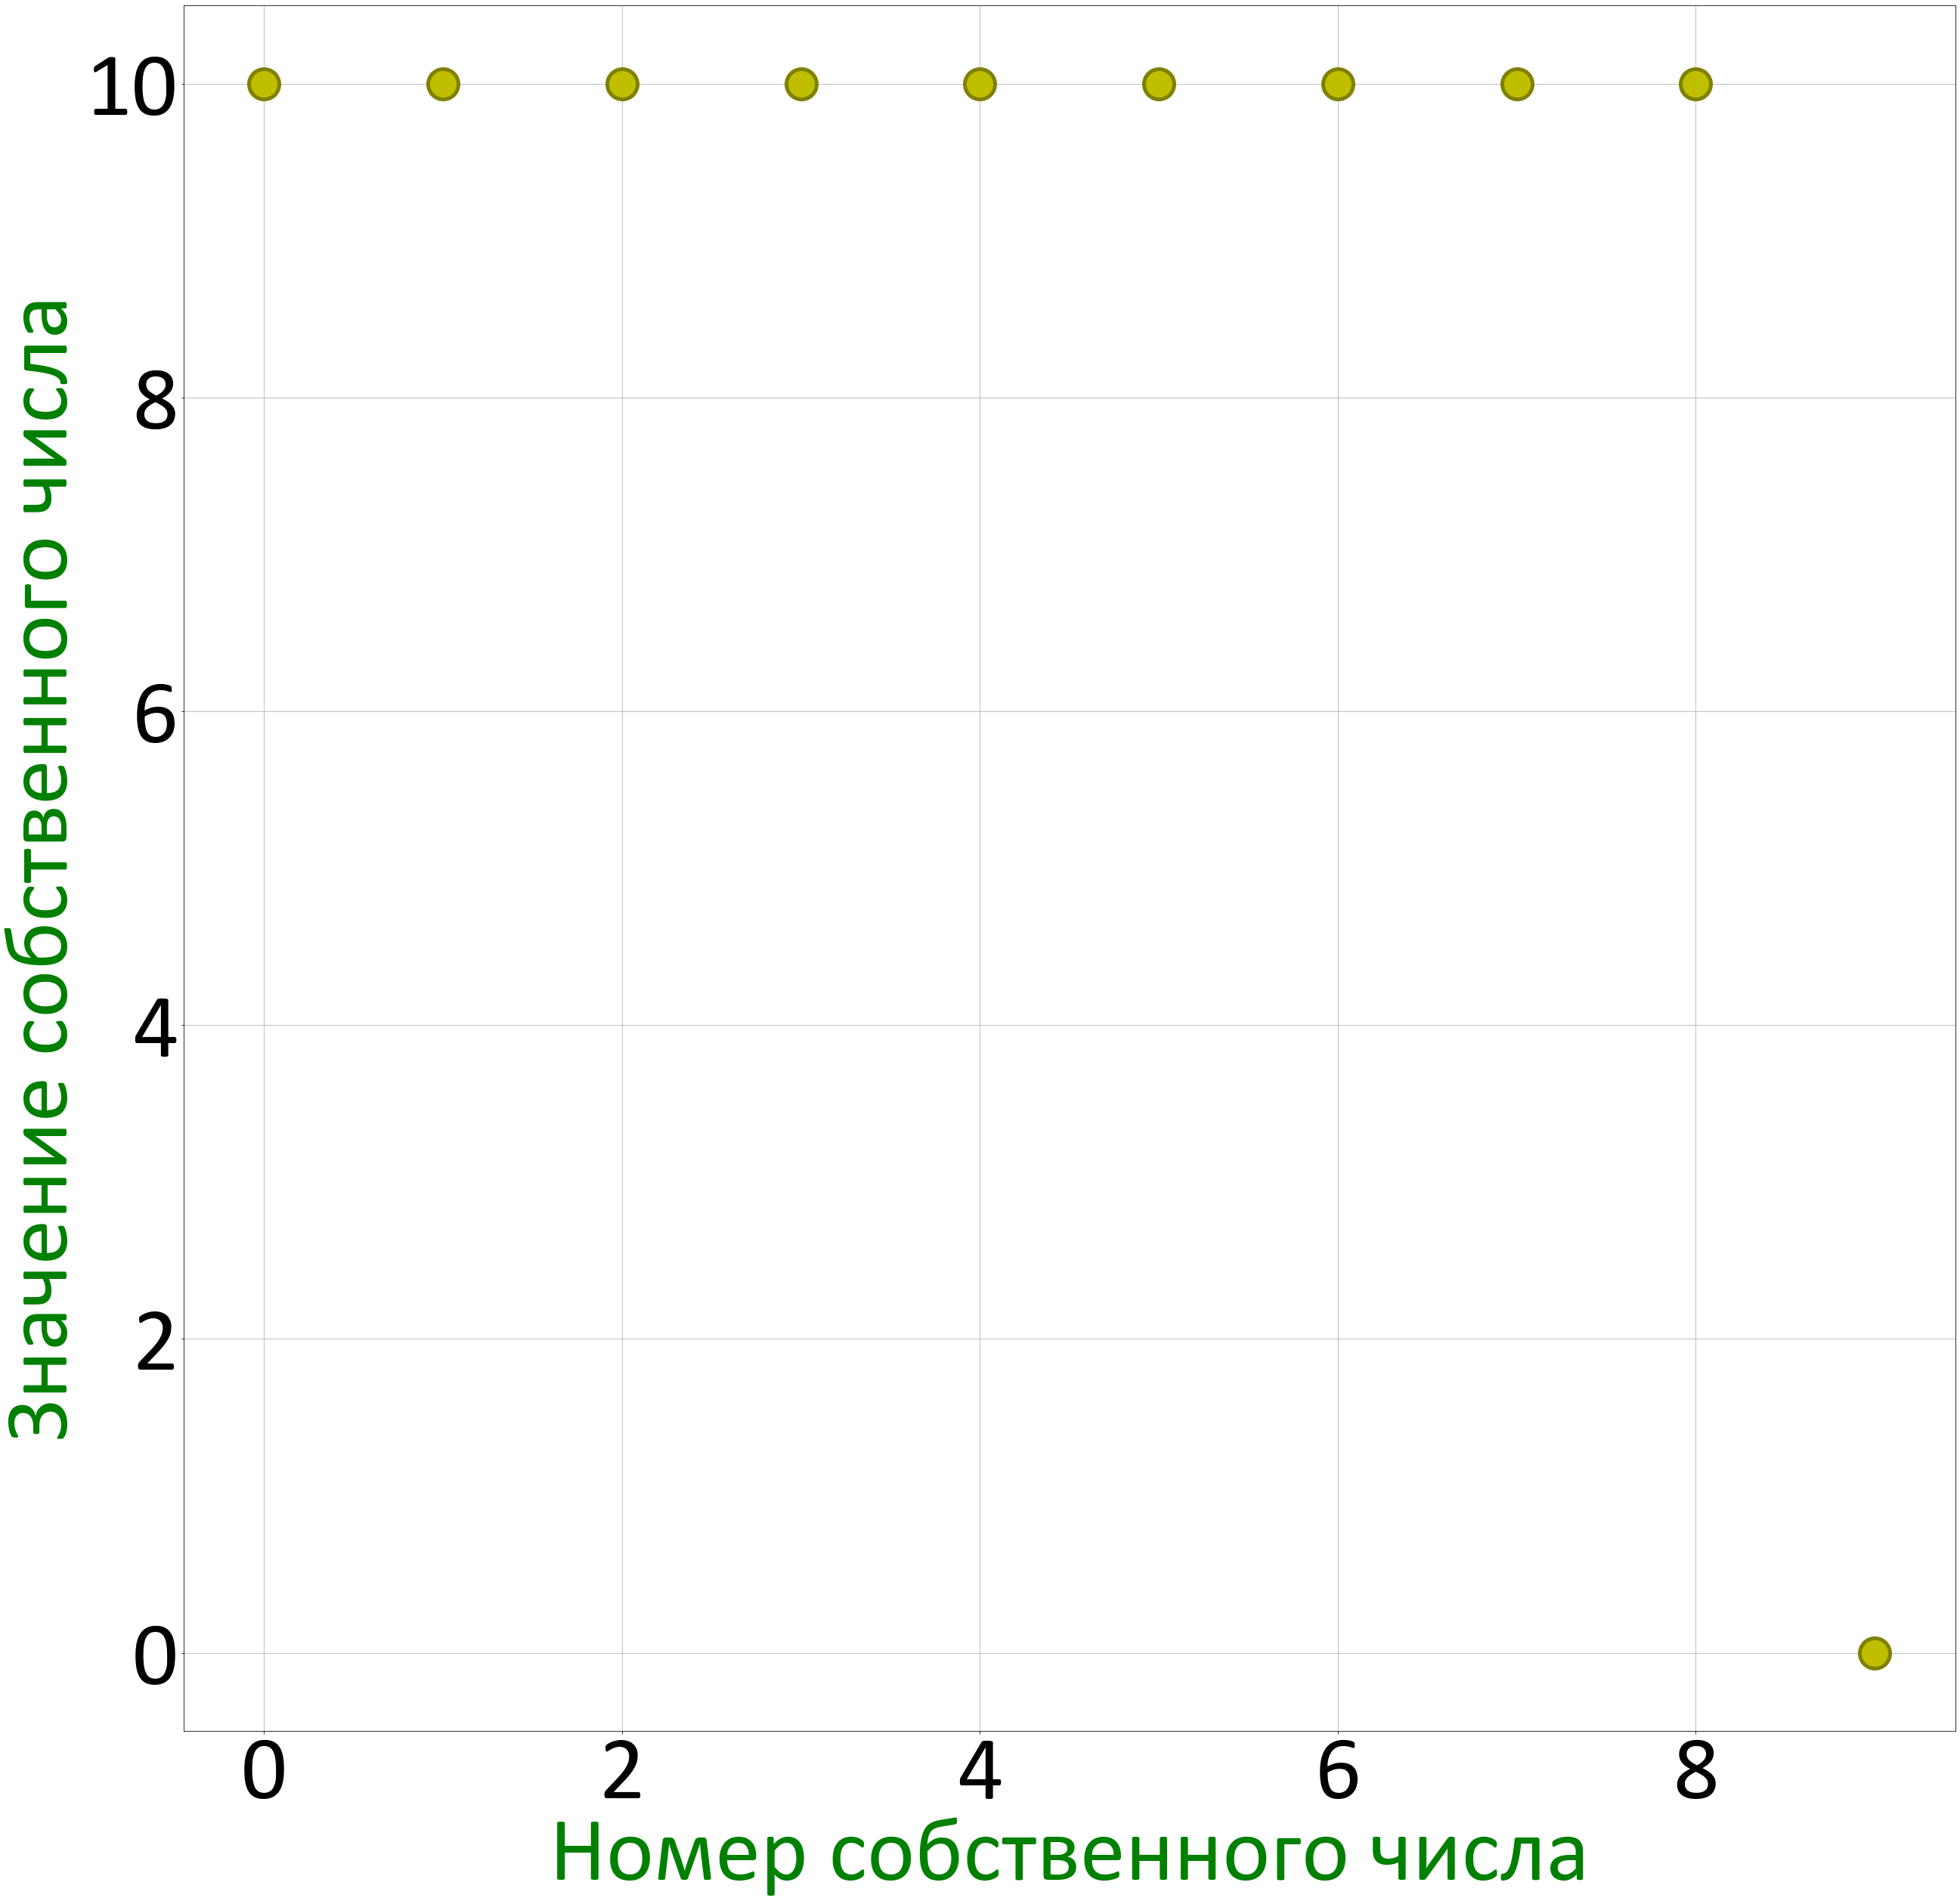

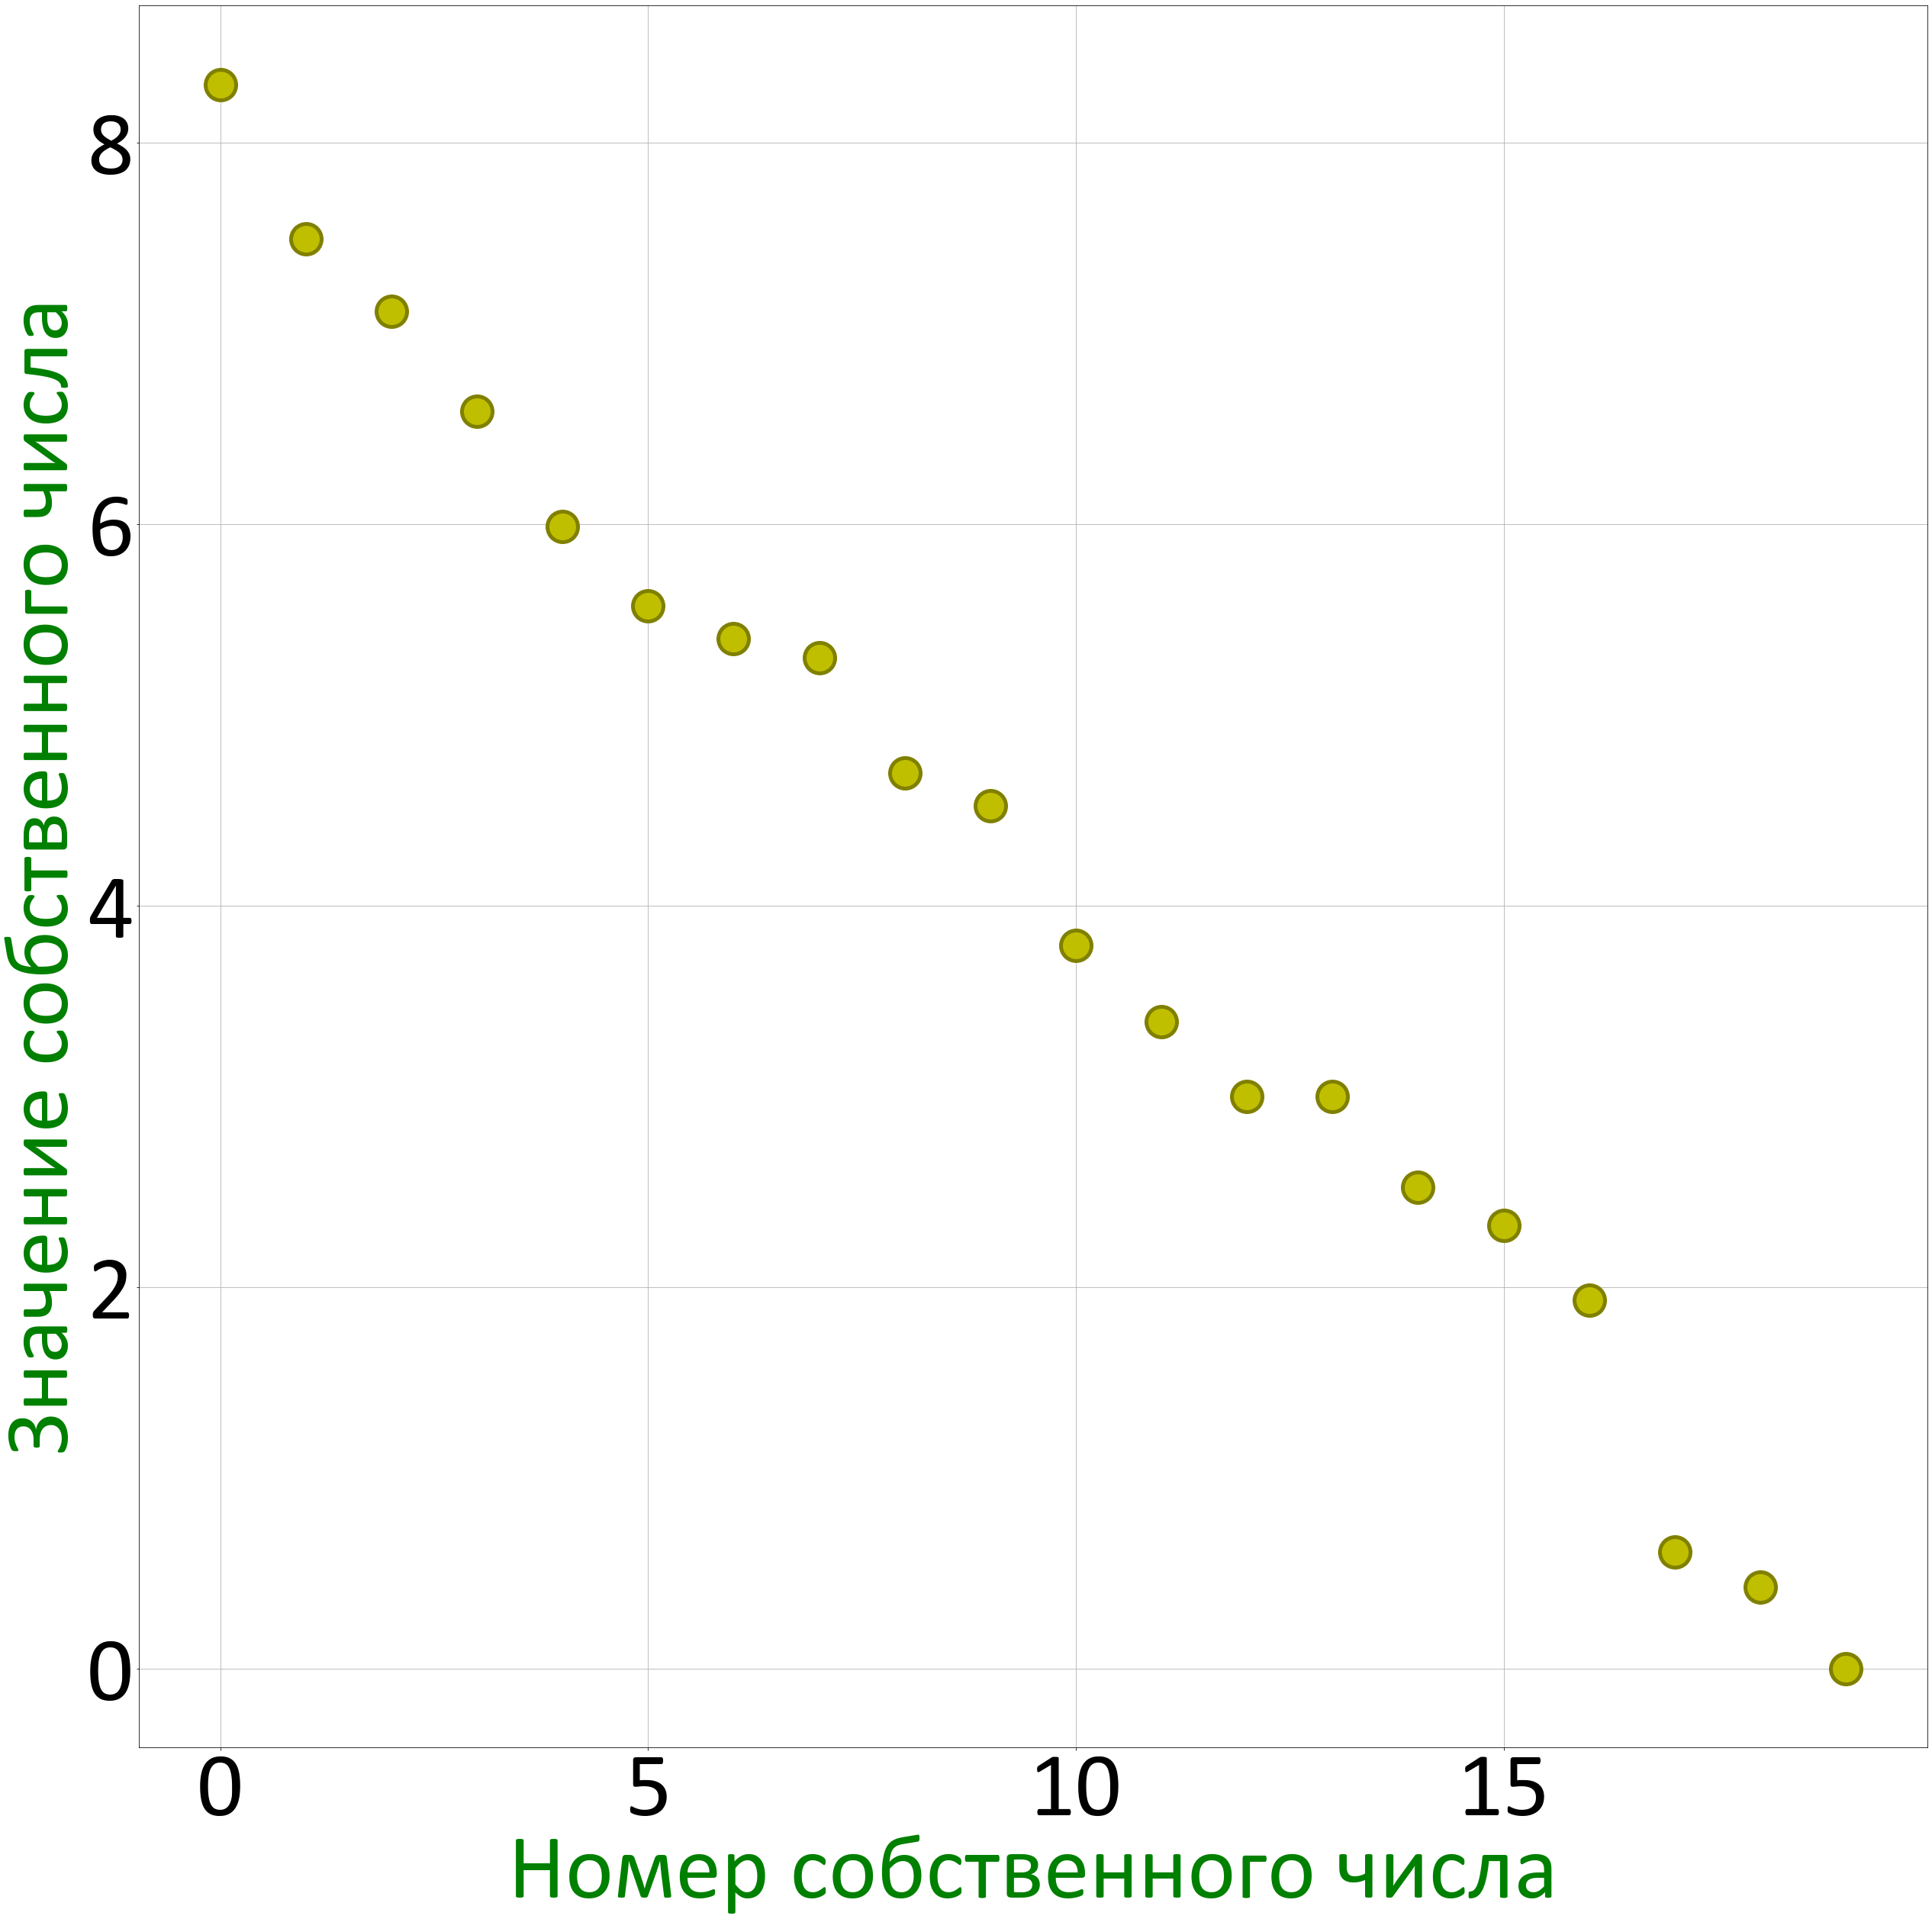

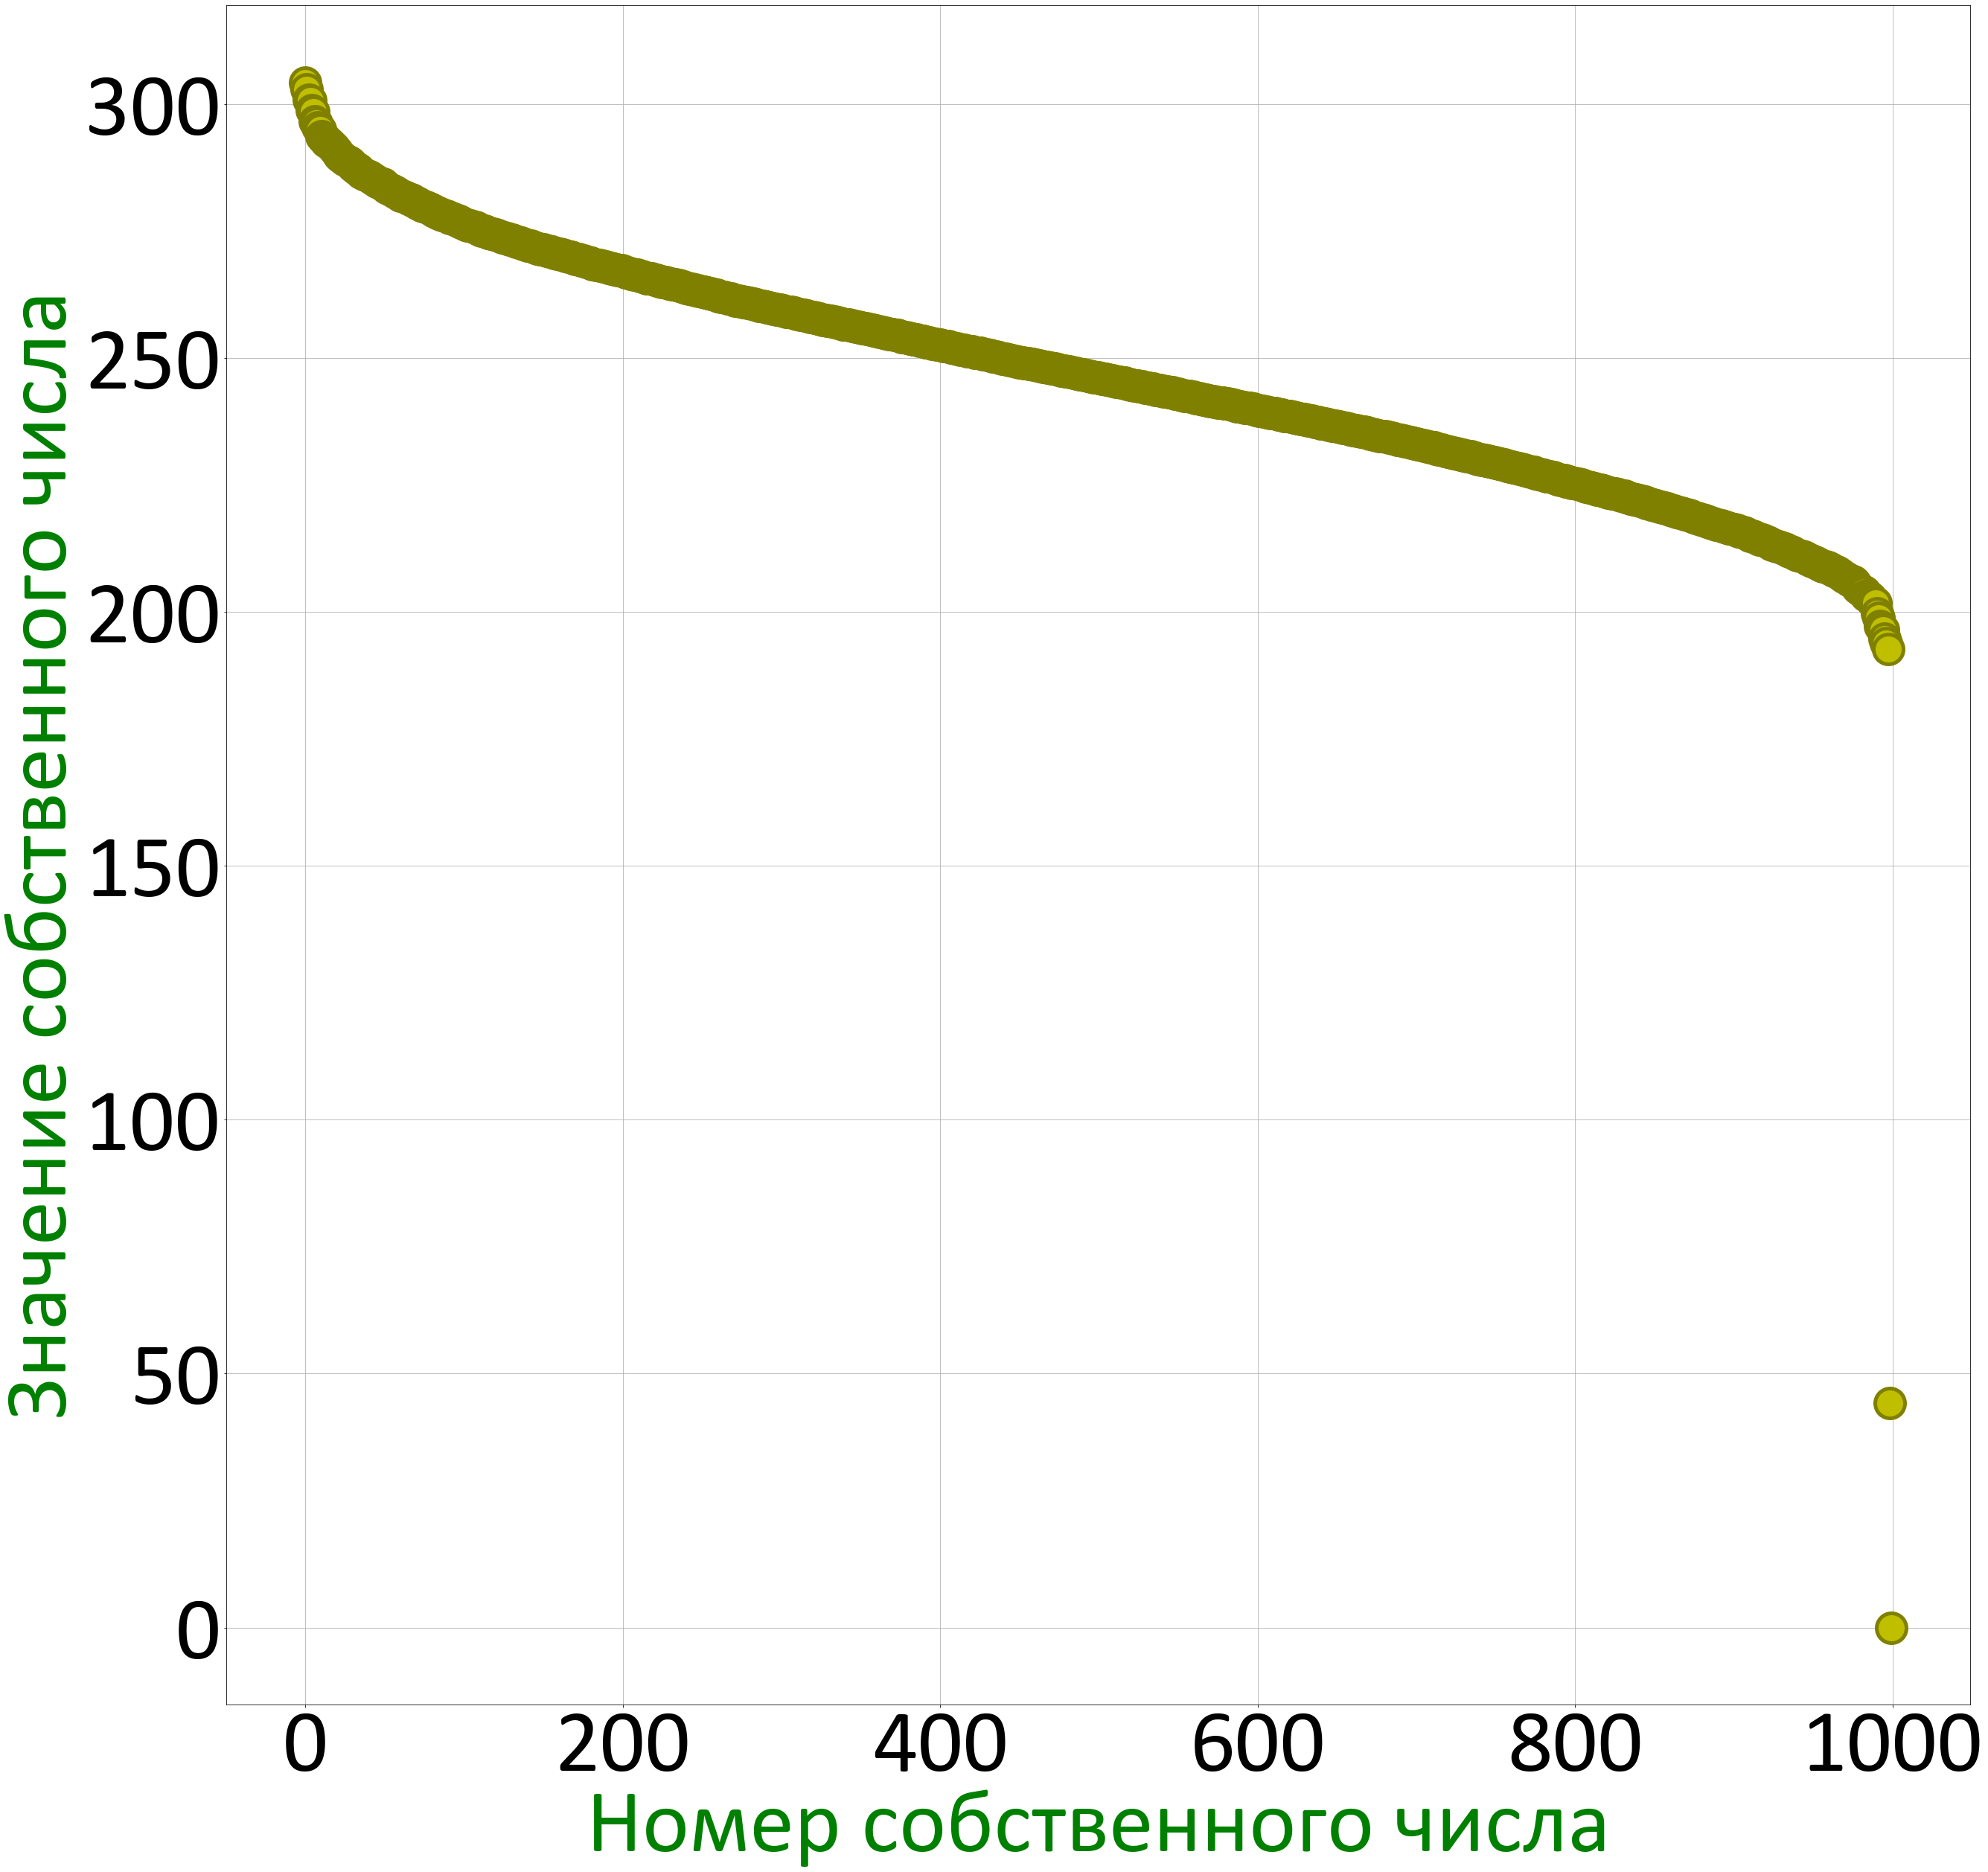

In [752]:
graph_vec(spec1[1], 'G1')
graph_vec(spec2[1], 'G2')
graph_vec(spec3[1], 'G3')

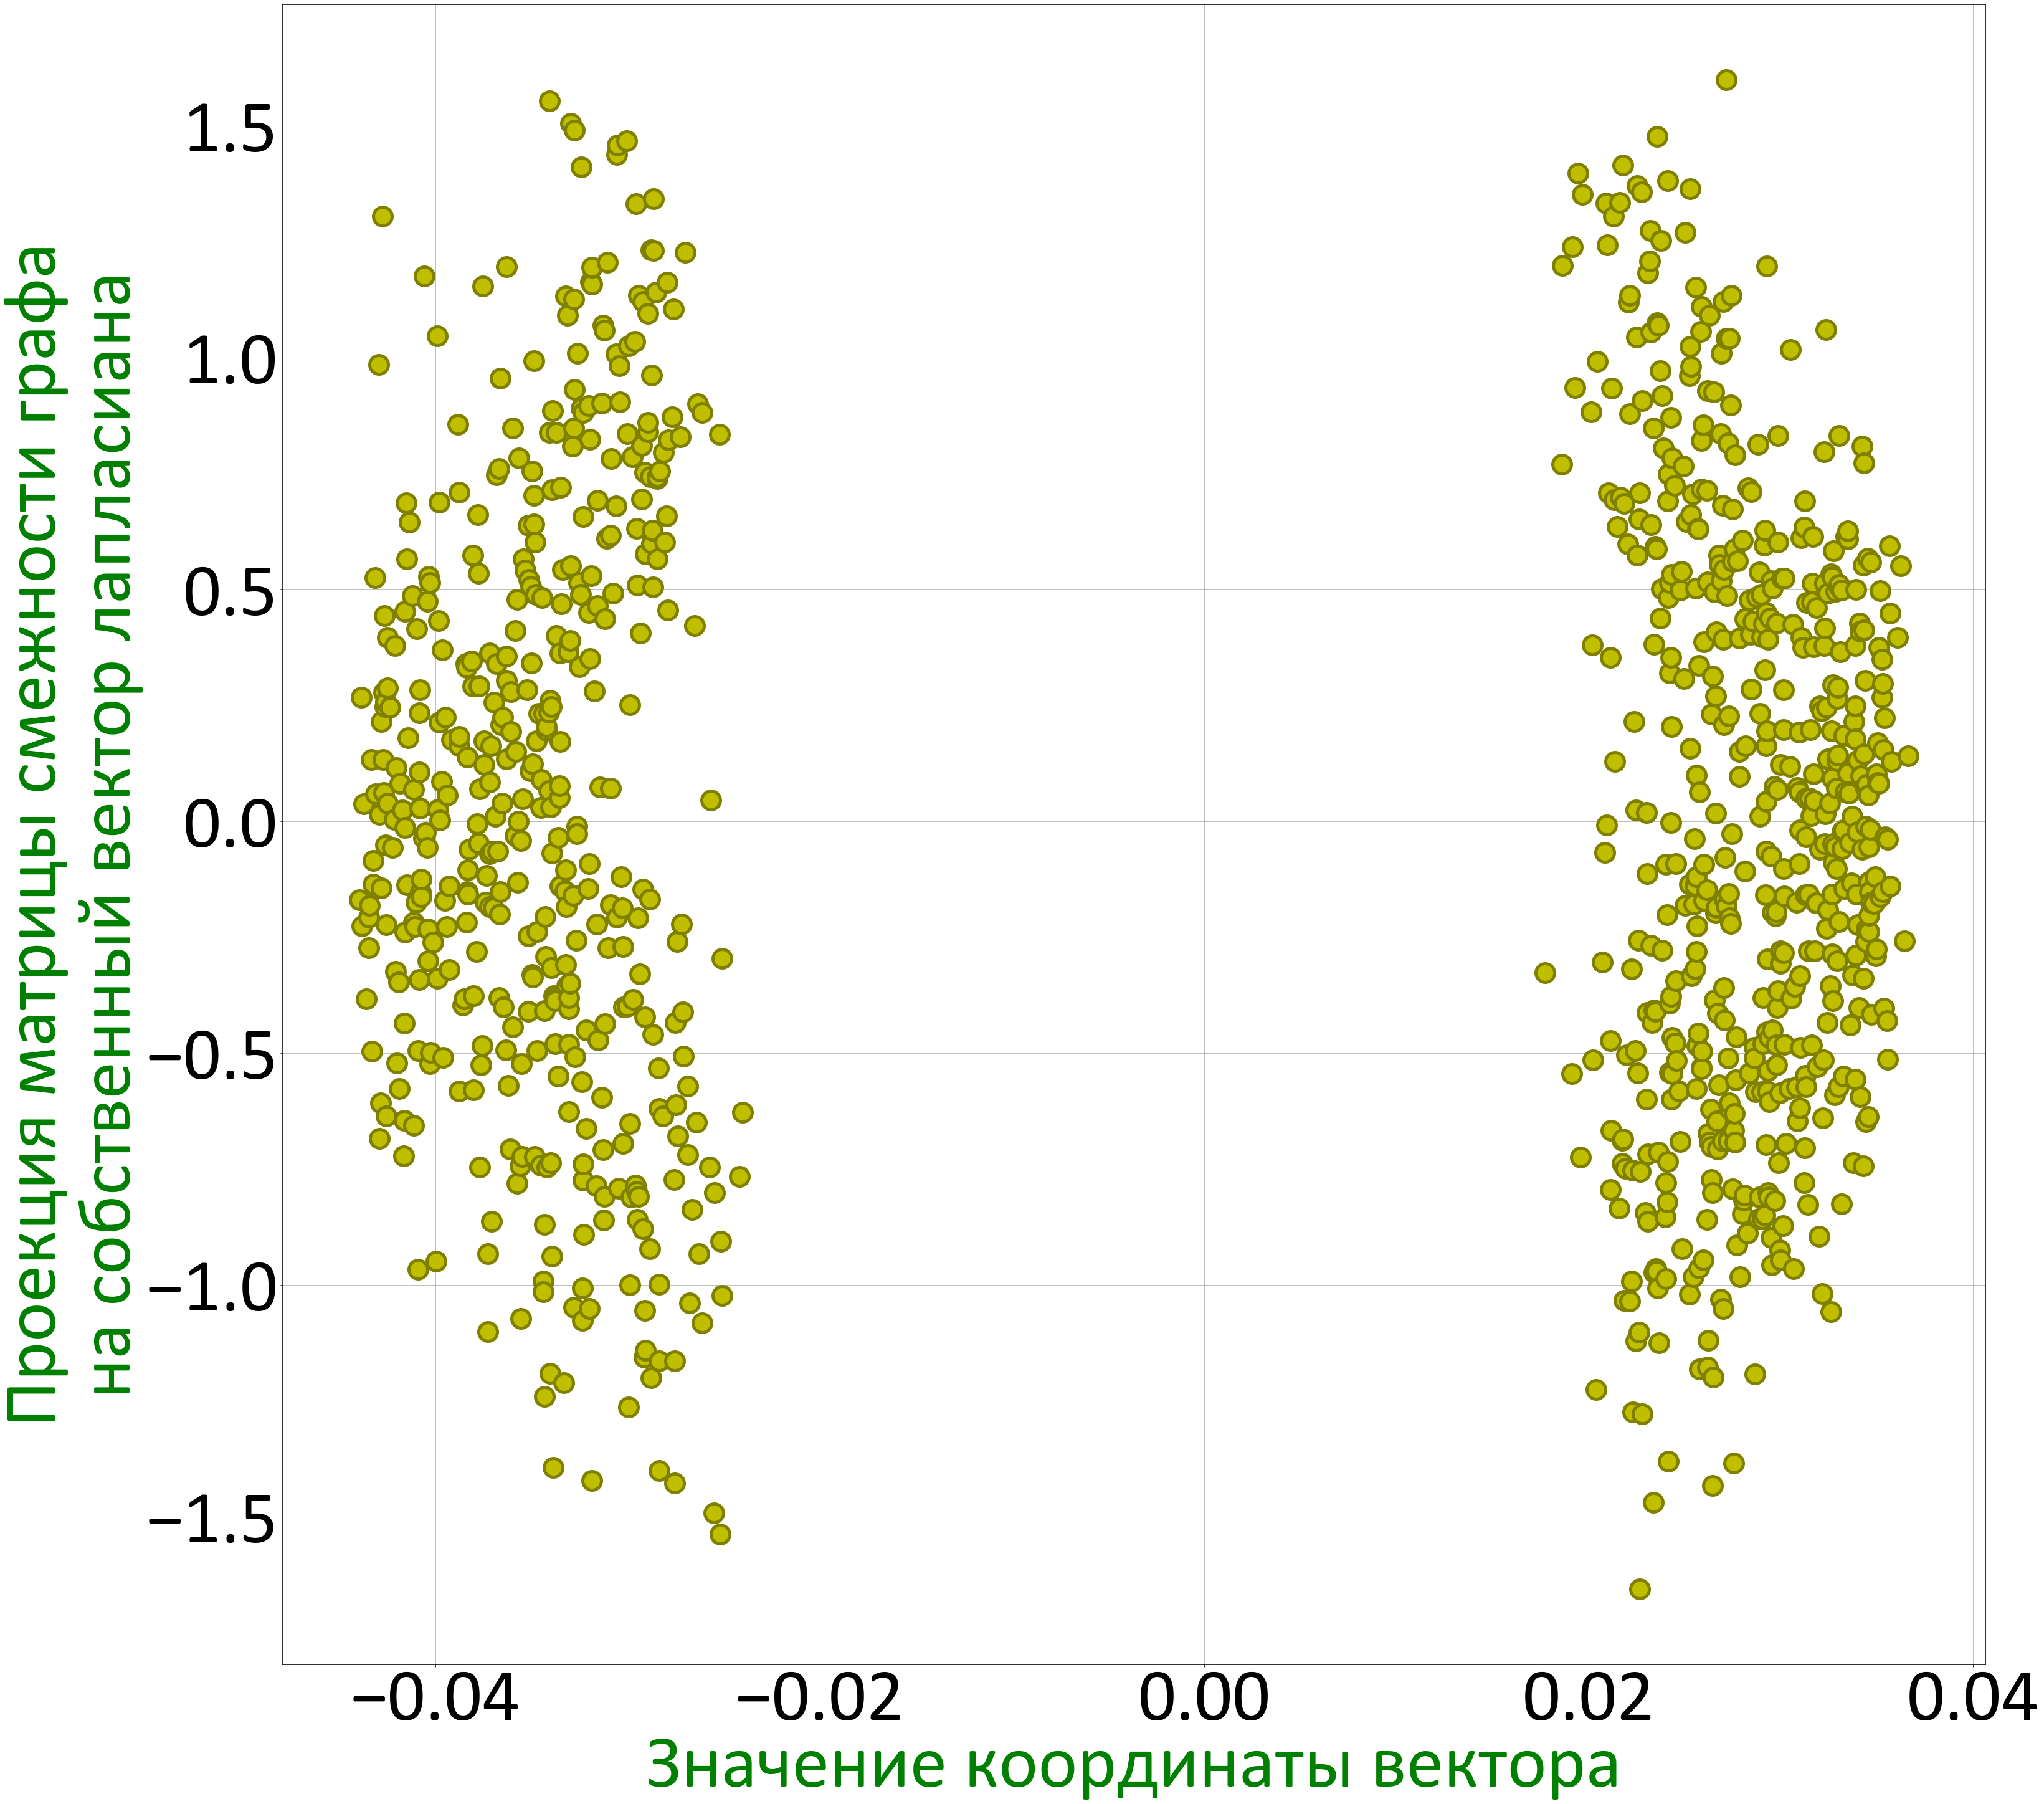

In [733]:
spec3[0][-2].sort()
spec_vec = np.column_stack([spec3[0][-2]])
G3_proj = G3 @ spec_vec
fig, ax = plt.subplots(figsize=(49, 49))
plt.xlabel('Значение координаты вектора', fontsize=120, color='green')
plt.ylabel('Проекция матрицы смежности графа\nна собственный вектор лапласиана', fontsize=120, color='green')
plt.rcParams.update({'font.size': 120}) 
plt.plot(spec_vec, G3_proj, color='green', linewidth = 0, marker = 'o', markersize = 30, markerfacecolor = 'y',
             markeredgecolor = 'olive', markeredgewidth = 5)
plt.grid()
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Calibri'
with PdfPages('Проекция матрицы смежности на два вектора G3.pdf') as pdf:
    pdf.savefig()

In [737]:
print(spec1[1][-2], spec2[1][-2], spec3[1][-2])

9.999999999999993 0.4265020685234118 44.246327359152424


In [748]:
def matsort(vec, M):
    idx = vec.argsort(axis = 0)  
    vec = vec[idx]
    M = M[idx]
    M = M[:, idx]
    return M

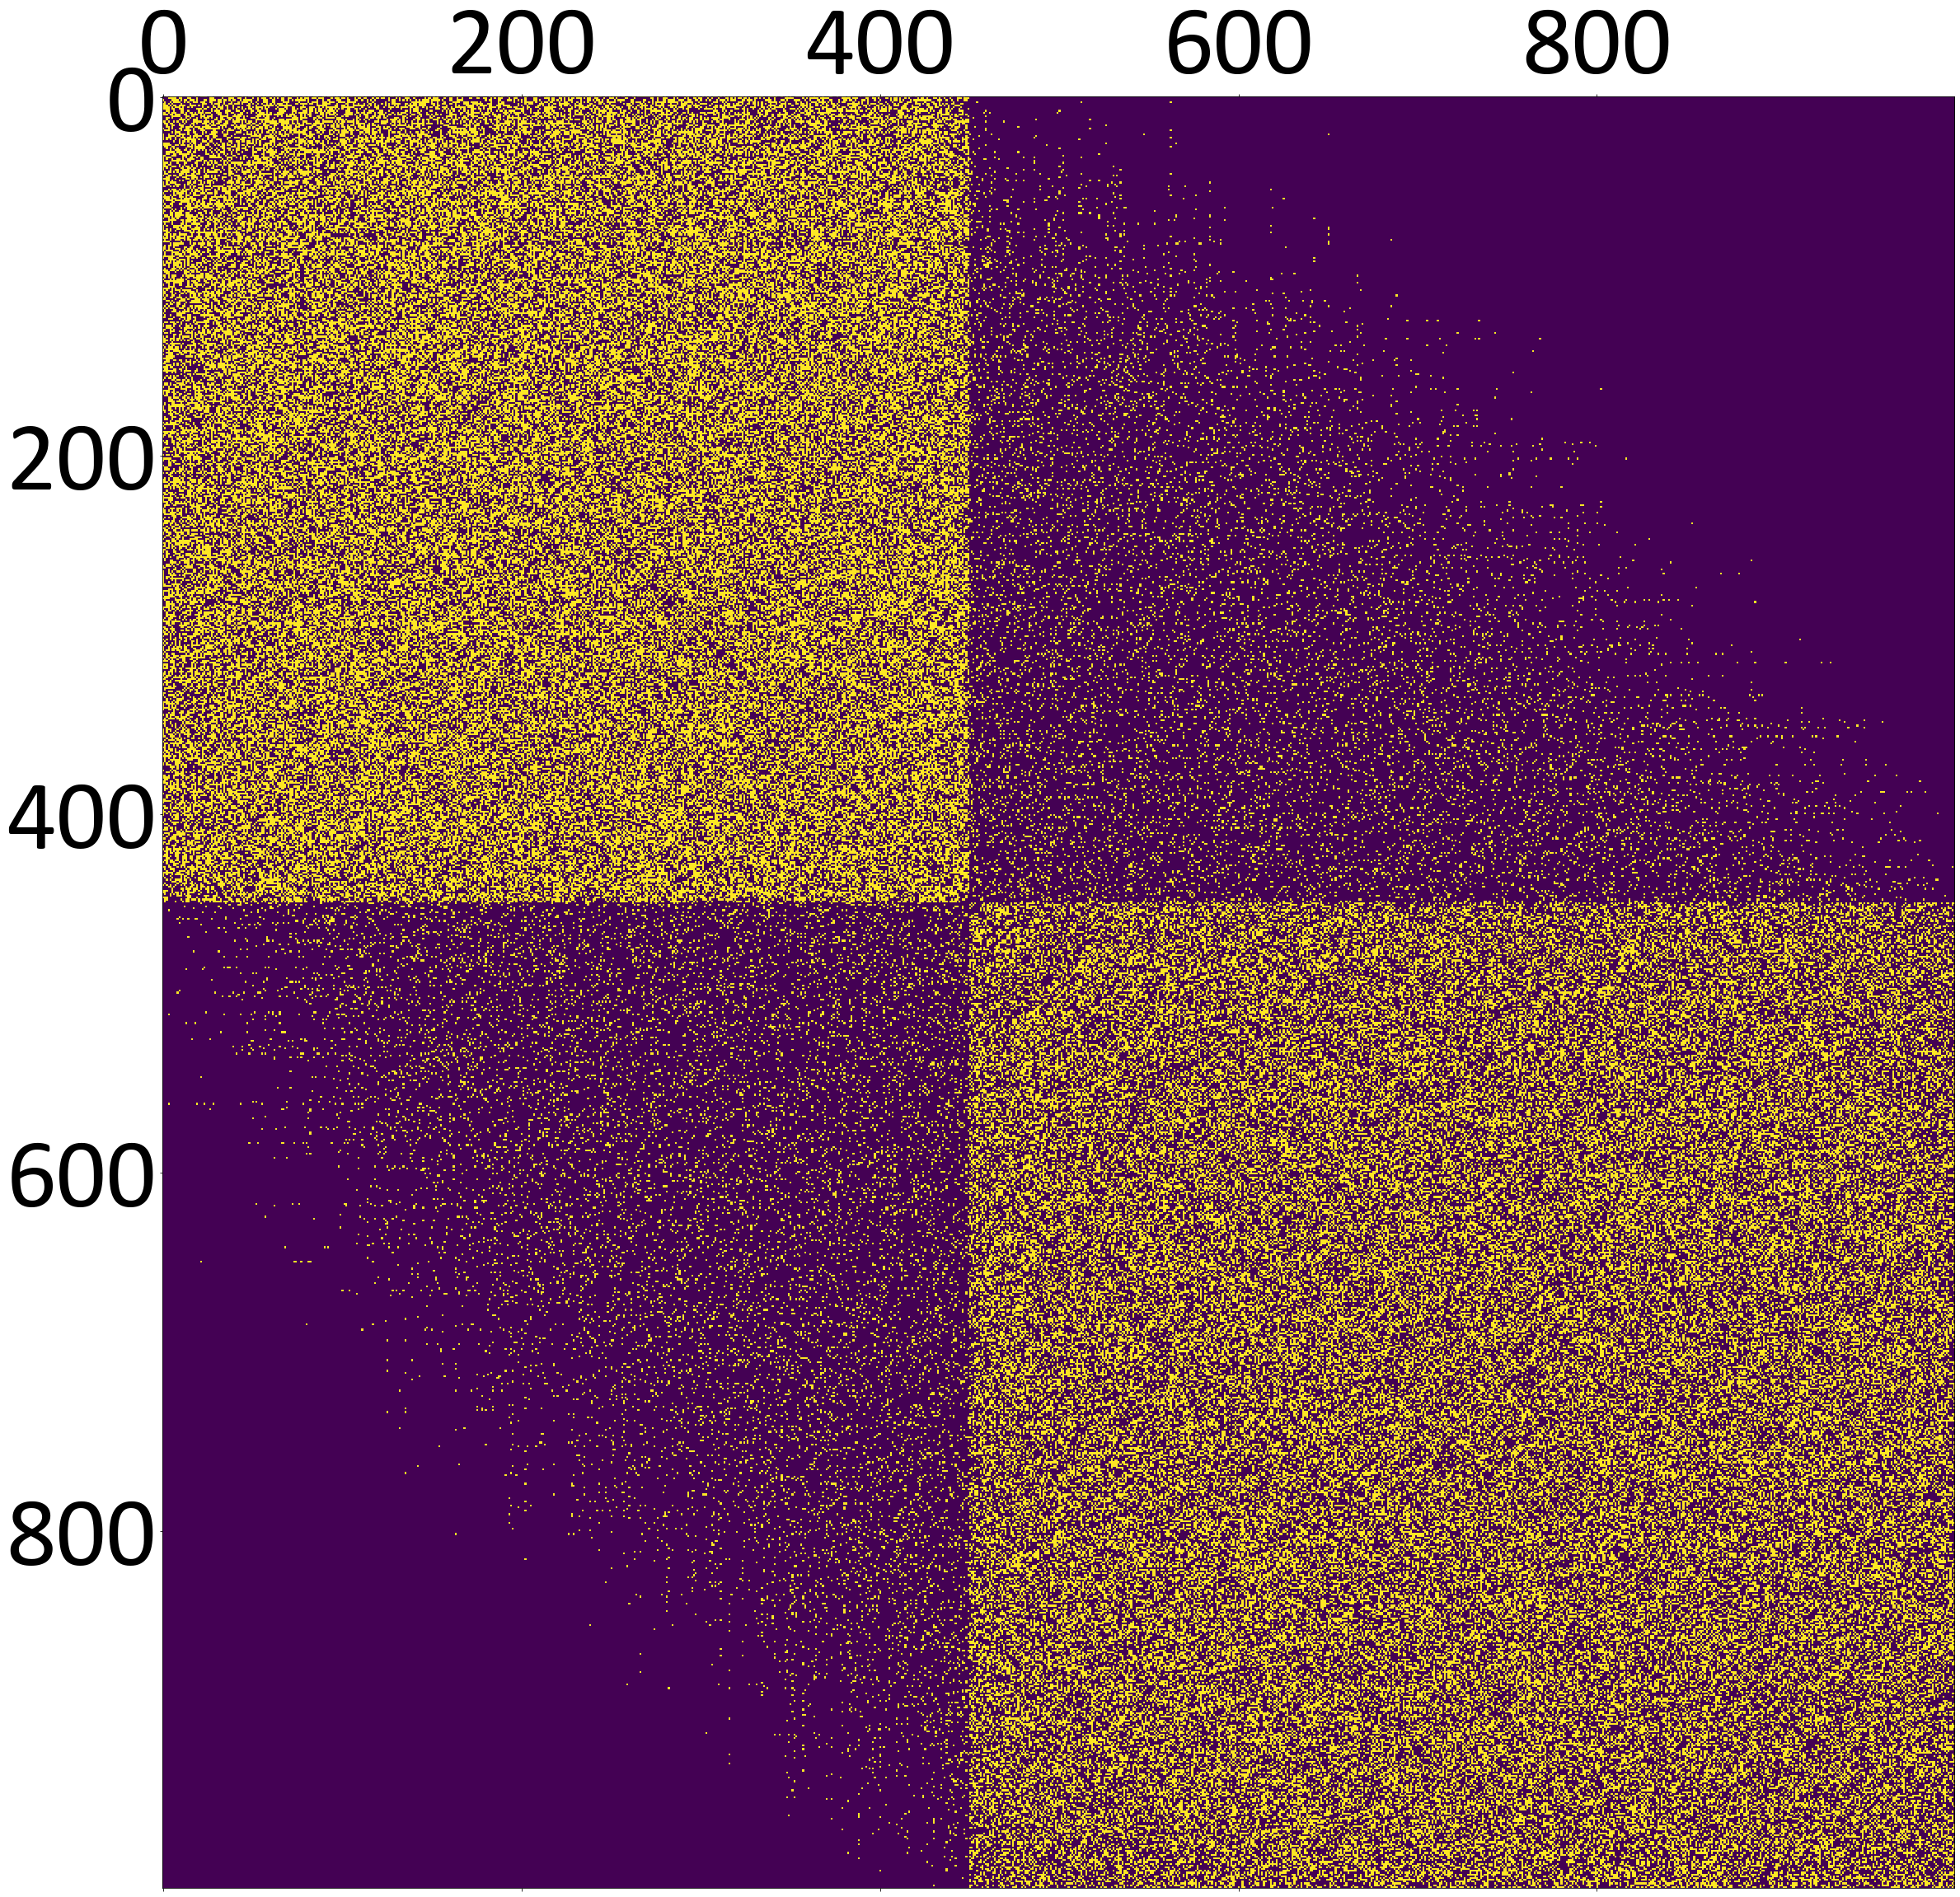

In [749]:
show_mat(matsort(spec3[0][-2], G3), 'Отсортированная матрица смежности графа G3')